# data collection

### filter down billboard songs

In [2]:
import csv

# Input file name (Billboard data from GitHub repo)
input_file = 'billboard_data.csv'

# Output file name for the filtered data
output_file = 'filtered_billboard_data.csv'

# Read the Billboard data from the CSV file
with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', newline='', encoding='utf-8') as outfile:
    reader = csv.DictReader(infile)
    fieldnames = reader.fieldnames
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)

    # Write the header row
    writer.writeheader()

    # Keep track of processed songs to avoid duplicates
    processed_songs = set()

    for row in reader:
        peak_pos = int(row['peak_pos'])
        song_title = row['title']
        artist = row['performer']

        # Filter songs based on peak position and remove duplicates
        if peak_pos <= 10 and (song_title, artist) not in processed_songs:
            processed_songs.add((song_title, artist))
            writer.writerow(row)

### get lyrics

In [1]:
import csv
import os
import lyricsgenius

# Replace 'YOUR_ACCESS_TOKEN' with your actual Genius API access token
access_token = 'E_psKBnQygjK7cOa0eRIK9rsFl9o0lfNR-__19tNZkp6GciXU9yOKsQampXP7A7b'

# Input file name (filtered Billboard data)
input_file = 'filtered_billboard_data.csv'

# Output directory for storing lyrics files
output_dir = 'lyrics'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Initialize the Genius API client
genius = lyricsgenius.Genius(access_token)

# Read the filtered Billboard data from the CSV file
with open(input_file, 'r', encoding='utf-8') as infile:
    reader = csv.DictReader(infile)

    for row in reader:
        song_title = row['title']
        artist = row['performer']
        chart_week = row['chart_week']
        year = chart_week.split('-')[0]

        # Generate a unique filename for the lyrics file
        filename = f"{year}_{song_title}_{artist}.txt"
        filename = ''.join(c for c in filename if c.isalnum() or c in ['-', '_', '.'])

        # Check if the lyrics file already exists
        if os.path.exists(os.path.join(output_dir, filename)):
            print(f"Lyrics file for {song_title} by {artist} already exists. Skipping download.")
        else:
            print(f"Fetching lyrics for {song_title} by {artist}")

            try:
                # Search for the song on Genius
                song = genius.search_song(song_title, artist)

                if song:
                    # Save the lyrics to a separate file
                    with open(os.path.join(output_dir, filename), 'w', encoding='utf-8') as outfile:
                        outfile.write(song.lyrics)
                else:
                    print(f"Song not found: {song_title} by {artist}")

            except Exception as e:
                print(f"Error fetching lyrics for {song_title} by {artist}: {str(e)}")

Lyrics file for All I Want For Christmas Is You by Mariah Carey already exists. Skipping download.
Lyrics file for Rockin' Around The Christmas Tree by Brenda Lee already exists. Skipping download.
Lyrics file for Jingle Bell Rock by Bobby Helms already exists. Skipping download.
Lyrics file for A Holly Jolly Christmas by Burl Ives already exists. Skipping download.
Lyrics file for Easy On Me by Adele already exists. Skipping download.
Lyrics file for It's The Most Wonderful Time Of The Year by Andy Williams already exists. Skipping download.
Lyrics file for Last Christmas by Wham! already exists. Skipping download.
Lyrics file for Feliz Navidad by Jose Feliciano already exists. Skipping download.
Fetching lyrics for Stay by The Kid LAROI & Justin Bieber
Searching for "Stay" by The Kid LAROI & Justin Bieber...
Error fetching lyrics for Stay by The Kid LAROI & Justin Bieber: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Lyrics file

Done.
Lyrics file for Monster Mash by Bobby "Boris" Pickett And The Crypt-Kickers already exists. Skipping download.
Fetching lyrics for Ghostbusters by Ray Parker Jr.
Searching for "Ghostbusters" by Ray Parker Jr....
Done.
Lyrics file for Rich Flex by Drake & 21 Savage already exists. Skipping download.
Lyrics file for Major Distribution by Drake & 21 Savage already exists. Skipping download.
Lyrics file for On BS by Drake & 21 Savage already exists. Skipping download.
Lyrics file for Spin Bout U by Drake & 21 Savage already exists. Skipping download.
Lyrics file for Pussy & Millions by Drake & 21 Savage Featuring Travis Scott already exists. Skipping download.
Lyrics file for Privileged Rappers by Drake & 21 Savage already exists. Skipping download.
Lyrics file for Circo Loco by Drake & 21 Savage already exists. Skipping download.
Lyrics file for BackOutsideBoyz by Drake already exists. Skipping download.
Fetching lyrics for I'm Good (Blue) by David Guetta & Bebe Rexha
Searching for 

No results found for: 'Carnival ¥$: Ye & Ty Dolla $ign Featuring Rich The Kid & Playboi Carti'
Song not found: Carnival by ¥$: Ye & Ty Dolla $ign Featuring Rich The Kid & Playboi Carti
Lyrics file for Act II: Date @ 8 by 4Batz Featuring Drake already exists. Skipping download.
Lyrics file for Enough (Miami) by Cardi B already exists. Skipping download.
Lyrics file for Like That by Future, Metro Boomin & Kendrick Lamar already exists. Skipping download.
Lyrics file for Type Shit by Future, Metro Boomin, Travis Scott & Playboi Carti already exists. Skipping download.
Lyrics file for Too Sweet by Hozier already exists. Skipping download.
Lyrics file for Cinderella by Future, Metro Boomin & Travis Scott already exists. Skipping download.
Lyrics file for We Don't Trust You by Future & Metro Boomin already exists. Skipping download.
Lyrics file for Young Metro by Future, Metro Boomin & The Weeknd already exists. Skipping download.
Lyrics file for II Most Wanted by Beyonce & Miley Cyrus alrea

No results found for: '(Now and Then There's) A Fool Such As I Elvis Presley With The Jordanaires'
Song not found: (Now and Then There's) A Fool Such As I by Elvis Presley With The Jordanaires
Fetching lyrics for I Need Your Love Tonight by Elvis Presley With The Jordanaires
Searching for "I Need Your Love Tonight" by Elvis Presley With The Jordanaires...
No results found for: 'I Need Your Love Tonight Elvis Presley With The Jordanaires'
Song not found: I Need Your Love Tonight by Elvis Presley With The Jordanaires
Fetching lyrics for The Happy Organ by Dave "Baby" Cortez
Searching for "The Happy Organ" by Dave "Baby" Cortez...
Specified song does not contain lyrics. Rejecting.
Song not found: The Happy Organ by Dave "Baby" Cortez
Lyrics file for Tell Him No by Travis & Bob already exists. Skipping download.
Lyrics file for Sorry (I Ran All The Way Home) by The Impalas already exists. Skipping download.
Lyrics file for Turn Me Loose by Fabian already exists. Skipping download.
Fetching

No results found for: 'Stuck On You Elvis Presley With The Jordanaires'
Song not found: Stuck On You by Elvis Presley With The Jordanaires
Lyrics file for Sixteen Reasons by Connie Stevens already exists. Skipping download.
Lyrics file for The Old Lamplighter by The Browns Featuring Jim Edward Brown already exists. Skipping download.
Fetching lyrics for White Silver Sands by Bill Black's Combo
Searching for "White Silver Sands" by Bill Black's Combo...
Specified song does not contain lyrics. Rejecting.
Song not found: White Silver Sands by Bill Black's Combo
Lyrics file for Night by Jackie Wilson already exists. Skipping download.
Lyrics file for Cradle Of Love by Johnny Preston already exists. Skipping download.
Lyrics file for Let The Little Girl Dance by Billy Bland already exists. Skipping download.
Lyrics file for Cathy's Clown by The Everly Brothers already exists. Skipping download.
Lyrics file for Stairway To Heaven by Neil Sedaka already exists. Skipping download.
Lyrics file 

Specified song does not contain lyrics. Rejecting.
Song not found: Wheels by The String-A-Longs
Fetching lyrics for Surrender by Elvis Presley With The Jordanaires
Searching for "Surrender" by Elvis Presley With The Jordanaires...
No results found for: 'Surrender Elvis Presley With The Jordanaires'
Song not found: Surrender by Elvis Presley With The Jordanaires
Lyrics file for Don't Worry by Marty Robbins already exists. Skipping download.
Lyrics file for Where The Boys Are by Connie Francis already exists. Skipping download.
Lyrics file for Ebony Eyes by The Everly Brothers already exists. Skipping download.
Lyrics file for Baby Sittin' Boogie by Buzz Clifford already exists. Skipping download.
Lyrics file for Spanish Harlem by Ben E. King already exists. Skipping download.
Fetching lyrics for Apache by Jorgen Ingmann & His Guitar
Searching for "Apache" by Jorgen Ingmann & His Guitar...
No results found for: 'Apache Jorgen Ingmann & His Guitar'
Song not found: Apache by Jorgen Ingmann

Done.
Lyrics file for Walk On By by Leroy Van Dyke already exists. Skipping download.
Lyrics file for I Understand (Just How You Feel) by The G-Clefs already exists. Skipping download.
Lyrics file for The Lion Sleeps Tonight by The Tokens already exists. Skipping download.
Lyrics file for Run To Him by Bobby Vee already exists. Skipping download.
Fetching lyrics for Tonight by Ferrante & Teicher
Searching for "Tonight" by Ferrante & Teicher...
Specified song does not contain lyrics. Rejecting.
Song not found: Tonight by Ferrante & Teicher
Fetching lyrics for Let There Be Drums by Sandy Nelson
Searching for "Let There Be Drums" by Sandy Nelson...
Specified song does not contain lyrics. Rejecting.
Song not found: Let There Be Drums by Sandy Nelson
Lyrics file for Happy Birthday, Sweet Sixteen by Neil Sedaka already exists. Skipping download.
Lyrics file for Peppermint Twist - Part I by Joey Dee & the Starliters already exists. Skipping download.
Fetching lyrics for Can't Help Falling In 

No results found for: 'She's Not You Elvis Presley With The Jordanaires'
Song not found: She's Not You by Elvis Presley With The Jordanaires
Lyrics file for Vacation by Connie Francis already exists. Skipping download.
Lyrics file for Ramblin' Rose by Nat King Cole already exists. Skipping download.
Lyrics file for Teen Age Idol by Rick Nelson already exists. Skipping download.
Lyrics file for Sherry by The 4 Seasons already exists. Skipping download.
Fetching lyrics for Green Onions by Booker T. & The MG's
Searching for "Green Onions" by Booker T. & The MG's...
Specified song does not contain lyrics. Rejecting.
Song not found: Green Onions by Booker T. & The MG's
Lyrics file for Patches by Dickey Lee already exists. Skipping download.
Fetching lyrics for Rinky Dink by Baby Cortez
Searching for "Rinky Dink" by Baby Cortez...
Specified song does not contain lyrics. Rejecting.
Song not found: Rinky Dink by Baby Cortez
Lyrics file for Let's Dance by Chris Montez already exists. Skipping d

Specified song does not contain lyrics. Rejecting.
Song not found: Memphis by Lonnie Mack
Fetching lyrics for Surf City by Jan & Dean
Searching for "Surf City" by Jan & Dean...
Done.
Lyrics file for So Much In Love by The Tymes already exists. Skipping download.
Lyrics file for Tie Me Kangaroo Down, Sport by Rolf Harris already exists. Skipping download.
Lyrics file for Wipe Out by The Surfaris already exists. Skipping download.
Lyrics file for Fingertips - Pt 2 by Little Stevie Wonder already exists. Skipping download.
Fetching lyrics for (You're the) Devil In Disguise by Elvis Presley With The Jordanaires
Searching for "(You're the) Devil In Disguise" by Elvis Presley With The Jordanaires...
No results found for: '(You're the) Devil In Disguise Elvis Presley With The Jordanaires'
Song not found: (You're the) Devil In Disguise by Elvis Presley With The Jordanaires
Lyrics file for Pride And Joy by Marvin Gaye already exists. Skipping download.
Lyrics file for Blowin' In The Wind by Pet

Done.
Lyrics file for The Shoop Shoop Song (It's In His Kiss) by Betty Everett already exists. Skipping download.
Lyrics file for Don't Let The Rain Come Down (Crooked Little Man) by The Serendipity Singers already exists. Skipping download.
Lyrics file for Do You Want To Know A Secret by The Beatles already exists. Skipping download.
Lyrics file for Dead Man's Curve by Jan & Dean already exists. Skipping download.
Lyrics file for Bits And Pieces by The Dave Clark Five already exists. Skipping download.
Lyrics file for My Guy by Mary Wells already exists. Skipping download.
Lyrics file for Ronnie by The 4 Seasons Featuring the "Sound of Frankie Valli" already exists. Skipping download.
Lyrics file for White On White by Danny Williams already exists. Skipping download.
Lyrics file for Love Me Do by The Beatles already exists. Skipping download.
Lyrics file for It's Over by Roy Orbison already exists. Skipping download.
Lyrics file for Chapel Of Love by The Dixie Cups already exists. Ski

Error fetching lyrics for My Girl by The Temptations: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Lyrics file for Shake by Sam Cooke already exists. Skipping download.
Lyrics file for The Jolly Green Giant by The Kingsmen already exists. Skipping download.
Lyrics file for I Go To Pieces by Peter And Gordon already exists. Skipping download.
Lyrics file for The Boy From New York City by The Ad Libs already exists. Skipping download.
Lyrics file for Tell Her No by The Zombies already exists. Skipping download.
Lyrics file for King Of The Road by Roger Miller already exists. Skipping download.
Lyrics file for Eight Days A Week by The Beatles already exists. Skipping download.
Lyrics file for The Birds And The Bees by Jewel Akens already exists. Skipping download.
Lyrics file for Ferry Cross The Mersey by Gerry And The Pacemakers already exists. Skipping download.
Lyrics file for Stop! In The Name Of Love by The Supremes already exi

No results found for: 'Let's Hang On! The 4 Seasons Featuring the "Sound of Frankie Valli"'
Song not found: Let's Hang On! by The 4 Seasons Featuring the "Sound of Frankie Valli"
Lyrics file for Ain't That Peculiar by Marvin Gaye already exists. Skipping download.
Lyrics file for Turn! Turn! Turn! (To Everything There Is A Season) by The Byrds already exists. Skipping download.
Fetching lyrics for I Got You (I Feel Good) by James Brown And The Famous Flames
Searching for "I Got You (I Feel Good)" by James Brown And The Famous Flames...
Done.
Lyrics file for You've Got To Hide Your Love Away by The Silkie already exists. Skipping download.
Lyrics file for I Can Never Go Home Anymore by The Shangri-Las already exists. Skipping download.
Lyrics file for Over And Over by The Dave Clark Five already exists. Skipping download.
Lyrics file for I Will by Dean Martin already exists. Skipping download.
Lyrics file for Make The World Go Away by Eddy Arnold already exists. Skipping download.
Lyric

Done.
Lyrics file for See You In September by The Happenings already exists. Skipping download.
Lyrics file for I Couldn't Live Without Your Love by Petula Clark already exists. Skipping download.
Lyrics file for Sunshine Superman by Donovan already exists. Skipping download.
Fetching lyrics for You Can't Hurry Love by The Supremes
Searching for "You Can't Hurry Love" by The Supremes...
Error fetching lyrics for You Can't Hurry Love by The Supremes: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Lyrics file for Yellow Submarine by The Beatles already exists. Skipping download.
Lyrics file for Summertime by Billy Stewart already exists. Skipping download.
Lyrics file for Land Of 1000 Dances by Wilson Pickett already exists. Skipping download.
Lyrics file for Working In The Coal Mine by Lee Dorsey already exists. Skipping download.
Lyrics file for Blowin In The Wind by Stevie Wonder already exists. Skipping download.
Lyrics file for 

No results found for: 'C'mon Marianne The 4 Seasons Featuring the "Sound of Frankie Valli"'
Song not found: C'mon Marianne by The 4 Seasons Featuring the "Sound of Frankie Valli"
Fetching lyrics for A Whiter Shade Of Pale by Procol Harum
Searching for "A Whiter Shade Of Pale" by Procol Harum...
Done.
Lyrics file for I Was Made To Love Her by Stevie Wonder already exists. Skipping download.
Lyrics file for Mercy, Mercy, Mercy by The Buckinghams already exists. Skipping download.
Lyrics file for White Rabbit by Jefferson Airplane already exists. Skipping download.
Lyrics file for All You Need Is Love by The Beatles already exists. Skipping download.
Lyrics file for Pleasant Valley Sunday by The Monkees already exists. Skipping download.
Lyrics file for Carrie-Anne by The Hollies already exists. Skipping download.
Lyrics file for A Girl Like You by The Young Rascals already exists. Skipping download.
Lyrics file for Baby I Love You by Aretha Franklin already exists. Skipping download.
Fet

Specified song does not contain lyrics. Rejecting.
Song not found: The Horse by Cliff Nobles & Co.
Lyrics file for Here Comes The Judge by Shorty Long already exists. Skipping download.
Lyrics file for Jumpin' Jack Flash by The Rolling Stones already exists. Skipping download.
Fetching lyrics for Grazing In The Grass by Hugh Masekela
Searching for "Grazing In The Grass" by Hugh Masekela...
Specified song does not contain lyrics. Rejecting.
Song not found: Grazing In The Grass by Hugh Masekela
Lyrics file for Lady Willpower by Gary Puckett And The Union Gap already exists. Skipping download.
Lyrics file for Stoned Soul Picnic by The 5th Dimension already exists. Skipping download.
Lyrics file for Indian Lake by The Cowsills already exists. Skipping download.
Lyrics file for Hurdy Gurdy Man by Donovan already exists. Skipping download.
Fetching lyrics for Classical Gas by Mason Williams
Searching for "Classical Gas" by Mason Williams...
Specified song does not contain lyrics. Rejecting.


Specified song does not contain lyrics. Rejecting.
Song not found: Time Is Tight by Booker T. & The MG's
Lyrics file for Sweet Cherry Wine by Tommy James And The Shondells already exists. Skipping download.
Fetching lyrics for Hawaii Five-O by The Ventures
Searching for "Hawaii Five-O" by The Ventures...
Specified song does not contain lyrics. Rejecting.
Song not found: Hawaii Five-O by The Ventures
Lyrics file for The Boxer by Simon & Garfunkel already exists. Skipping download.
Lyrics file for Atlantis by Donovan already exists. Skipping download.
Lyrics file for Get Back by The Beatles With Billy Preston already exists. Skipping download.
Lyrics file for Love (Can Make You Happy) by Mercy already exists. Skipping download.
Lyrics file for Gitarzan by Ray Stevens already exists. Skipping download.
Lyrics file for These Eyes by The Guess Who already exists. Skipping download.
Lyrics file for Oh Happy Day by The Edwin Hawkins' Singers Featuring Dorothy Combs Morrison already exists. Sk

Error fetching lyrics for Bridge Over Troubled Water by Simon & Garfunkel: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Fetching lyrics for Rainy Night In Georgia/Rubberneckin' by Brook Benton
Searching for "Rainy Night In Georgia/Rubberneckin'" by Brook Benton...
No results found for: 'Rainy Night In Georgia/Rubberneckin' Brook Benton'
Song not found: Rainy Night In Georgia/Rubberneckin' by Brook Benton
Lyrics file for Ma Belle Amie by The Tee Set already exists. Skipping download.
Lyrics file for The Rapper by The Jaggerz already exists. Skipping download.
Lyrics file for Give Me Just A Little More Time by Chairman Of The Board already exists. Skipping download.
Lyrics file for He Ain't Heavy, He's My Brother by The Hollies already exists. Skipping download.
Lyrics file for Evil Ways by Santana already exists. Skipping download.
Lyrics file for Instant Karma (We All Shine On) by John Ono Lennon already exists. Skipping download

Done.
Lyrics file for It's Impossible by Perry Como already exists. Skipping download.
Lyrics file for I Hear You Knocking by Dave Edmunds already exists. Skipping download.
Lyrics file for One Bad Apple by The Osmonds already exists. Skipping download.
Lyrics file for If I Were Your Woman by Gladys Knight And The Pips already exists. Skipping download.
Lyrics file for Mama's Pearl by Jackson 5 already exists. Skipping download.
Lyrics file for If You Could Read My Mind by Gordon Lightfoot already exists. Skipping download.
Lyrics file for Sweet Mary by Wadsworth Mansion already exists. Skipping download.
Lyrics file for Mr. Bojangles by Nitty Gritty Dirt Band already exists. Skipping download.
Lyrics file for Amos Moses by Jerry Reed already exists. Skipping download.
Lyrics file for Me And Bobby McGee by Janis Joplin already exists. Skipping download.
Lyrics file for Just My Imagination (Running Away With Me) by The Temptations already exists. Skipping download.
Lyrics file for She's

Done.
Lyrics file for Got To Be There by Michael Jackson already exists. Skipping download.
Lyrics file for Rock Steady by Aretha Franklin already exists. Skipping download.
Lyrics file for Desiderata by Les Crane already exists. Skipping download.
Lyrics file for An Old Fashioned Love Song by Three Dog Night already exists. Skipping download.
Lyrics file for All I Ever Need Is You by Sonny & Cher already exists. Skipping download.
Lyrics file for Brand New Key by Melanie already exists. Skipping download.
Lyrics file for American Pie (Parts I & II) by Don McLean already exists. Skipping download.
Lyrics file for Cherish by David Cassidy already exists. Skipping download.
Fetching lyrics for Scorpio by Dennis Coffey & The Detroit Guitar Band
Searching for "Scorpio" by Dennis Coffey & The Detroit Guitar Band...
Specified song does not contain lyrics. Rejecting.
Song not found: Scorpio by Dennis Coffey & The Detroit Guitar Band
Lyrics file for Hey Girl/I Knew You When by Donny Osmond alr

Specified song does not contain lyrics. Rejecting.
Song not found: Popcorn by Hot Butter
Lyrics file for My Ding-A-Ling by Chuck Berry already exists. Skipping download.
Lyrics file for Nights In White Satin by The Moody Blues already exists. Skipping download.
Lyrics file for Garden Party by Rick Nelson And The Stone Canyon Band already exists. Skipping download.
Lyrics file for I Can See Clearly Now by Johnny Nash already exists. Skipping download.
Lyrics file for Freddie's Dead (Theme From "Superfly") by Curtis Mayfield already exists. Skipping download.
Lyrics file for Good Time Charlie's Got The Blues by Danny O'Keefe already exists. Skipping download.
Lyrics file for I'll Be Around by The Spinners already exists. Skipping download.
Lyrics file for I'd Love You To Want Me by Lobo already exists. Skipping download.
Lyrics file for I Am Woman by Helen Reddy already exists. Skipping download.
Lyrics file for Convention '72 by The Delegates already exists. Skipping download.
Lyrics fi

No results found for: 'Loves Me Like A Rock Paul Simon (with The Dixie Hummingbirds)'
Song not found: Loves Me Like A Rock by Paul Simon (with The Dixie Hummingbirds)
Lyrics file for We're An American Band by Grand Funk already exists. Skipping download.
Lyrics file for Gypsy Man by War already exists. Skipping download.
Lyrics file for Here I Am Come & Take Me by Al Green already exists. Skipping download.
Lyrics file for Half-Breed by Cher already exists. Skipping download.
Lyrics file for Higher Ground by Stevie Wonder already exists. Skipping download.
Lyrics file for That Lady (Part 1) by The Isley Brothers already exists. Skipping download.
Lyrics file for My Maria by B.W. Stevenson already exists. Skipping download.
Fetching lyrics for Ramblin Man by The Allman Brothers Band
Searching for "Ramblin Man" by The Allman Brothers Band...
Done.
Lyrics file for Angie by The Rolling Stones already exists. Skipping download.
Lyrics file for Keep On Truckin' (Part 1) by Eddie Kendricks al

No results found for: 'You Ain't Seen Nothing Yet/Free Wheelin' Bachman-Turner Overdrive'
Song not found: You Ain't Seen Nothing Yet/Free Wheelin' by Bachman-Turner Overdrive
Lyrics file for Stop And Smell The Roses by Mac Davis already exists. Skipping download.
Fetching lyrics for Whatever Gets You Thru The Night by John Lennon With The Plastic Ono Nuclear Band
Searching for "Whatever Gets You Thru The Night" by John Lennon With The Plastic Ono Nuclear Band...
No results found for: 'Whatever Gets You Thru The Night John Lennon With The Plastic Ono Nuclear Band'
Song not found: Whatever Gets You Thru The Night by John Lennon With The Plastic Ono Nuclear Band
Lyrics file for Tin Man by America already exists. Skipping download.
Lyrics file for Back Home Again by John Denver already exists. Skipping download.
Lyrics file for My Melody Of Love by Bobby Vinton already exists. Skipping download.
Lyrics file for Do It ('til You're Satisfied) by B.T. Express already exists. Skipping download

Error fetching lyrics for Magic by Pilot: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Lyrics file for One Of These Nights by Eagles already exists. Skipping download.
Lyrics file for Please Mr. Please by Olivia Newton-John already exists. Skipping download.
Lyrics file for Swearin' To God by Frankie Valli already exists. Skipping download.
Lyrics file for I'm Not In Love by 10cc already exists. Skipping download.
Lyrics file for Jive Talkin' by Bee Gees already exists. Skipping download.
Lyrics file for Rockin' Chair by Gwen McCrae already exists. Skipping download.
Lyrics file for Someone Saved My Life Tonight by Elton John already exists. Skipping download.
Lyrics file for Midnight Blue by Melissa Manchester already exists. Skipping download.
Fetching lyrics for Dynomite-Part I by Tony Camillo's Bazuka
Searching for "Dynomite-Part I" by Tony Camillo's Bazuka...
No results found for: 'Dynomite-Part I Tony Camillo's Bazuka'
Song

No results found for: 'Happy Days Pratt & McClain with Brother Love'
Song not found: Happy Days by Pratt & McClain with Brother Love
Lyrics file for Shannon by Henry Gross already exists. Skipping download.
Lyrics file for Misty Blue by Dorothy Moore already exists. Skipping download.
Lyrics file for Tryin' To Get The Feeling Again by Barry Manilow already exists. Skipping download.
Lyrics file for Sara Smile by Daryl Hall John Oates already exists. Skipping download.
Lyrics file for Shop Around by Captain & Tennille already exists. Skipping download.
Lyrics file for Fool To Cry by The Rolling Stones already exists. Skipping download.
Lyrics file for More, More, More Pt. 1 by Andrea True Connection already exists. Skipping download.
Lyrics file for Afternoon Delight by Starland Vocal Band already exists. Skipping download.
Lyrics file for I'll Be Good To You by The Brothers Johnson already exists. Skipping download.
Lyrics file for Kiss And Say Goodbye by The Manhattans already exists.

Done.
Lyrics file for Strawberry Letter 23 by The Brothers Johnson already exists. Skipping download.
Lyrics file for Telephone Line by Electric Light Orchestra already exists. Skipping download.
Fetching lyrics for Smoke From A Distant Fire by The Sanford/Townsend Band
Searching for "Smoke From A Distant Fire" by The Sanford/Townsend Band...
No results found for: 'Smoke From A Distant Fire The Sanford/Townsend Band'
Song not found: Smoke From A Distant Fire by The Sanford/Townsend Band
Lyrics file for Keep It Comin' Love by KC And The Sunshine Band already exists. Skipping download.
Lyrics file for Star Wars (Main Title) by London Symphony Orchestra already exists. Skipping download.
Lyrics file for Star Wars Theme/Cantina Band by Meco already exists. Skipping download.
Lyrics file for That's Rock 'N' Roll by Shaun Cassidy already exists. Skipping download.
Lyrics file for Cold As Ice by Foreigner already exists. Skipping download.
Lyrics file for Nobody Does It Better by Carly Simon 

Done.
Lyrics file for Fire by The Pointer Sisters already exists. Skipping download.
Lyrics file for I Will Survive by Gloria Gaynor already exists. Skipping download.
Lyrics file for Lotta Love by Nicolette Larson already exists. Skipping download.
Lyrics file for Somewhere In The Night by Barry Manilow already exists. Skipping download.
Lyrics file for I Was Made For Dancin' by Leif Garrett already exists. Skipping download.
Lyrics file for Tragedy by Bee Gees already exists. Skipping download.
Lyrics file for Heaven Knows by Donna Summer With Brooklyn Dreams already exists. Skipping download.
Lyrics file for What A Fool Believes by The Doobie Brothers already exists. Skipping download.
Lyrics file for Shake Your Groove Thing by Peaches & Herb already exists. Skipping download.
Lyrics file for Sultans Of Swing by Dire Straits already exists. Skipping download.
Lyrics file for What You Won't Do For Love by Bobby Caldwell already exists. Skipping download.
Lyrics file for Knock On Wood

Done.
Lyrics file for Hold On To My Love by Jimmy Ruffin already exists. Skipping download.
Lyrics file for Don't Fall In Love With A Dreamer by Kenny Rogers With Kim Carnes already exists. Skipping download.
Lyrics file for Funkytown by Lipps, Inc. already exists. Skipping download.
Lyrics file for Biggest Part Of Me by Ambrosia already exists. Skipping download.
Lyrics file for Stomp! by The Brothers Johnson already exists. Skipping download.
Lyrics file for Hurt So Bad by Linda Ronstadt already exists. Skipping download.
Lyrics file for Cars by Gary Numan already exists. Skipping download.
Lyrics file for Coming Up (Live At Glasgow) by Paul McCartney And Wings already exists. Skipping download.
Lyrics file for Against The Wind by Bob Seger already exists. Skipping download.
Lyrics file for The Rose by Bette Midler already exists. Skipping download.
Lyrics file for Little Jeannie by Elton John already exists. Skipping download.
Lyrics file for It's Still Rock And Roll To Me by Billy 

Done.
Fetching lyrics for Jessie's Girl by Rick Springfield
Searching for "Jessie's Girl" by Rick Springfield...
Done.
Lyrics file for Elvira by The Oak Ridge Boys already exists. Skipping download.
Fetching lyrics for Theme From "Greatest American Hero" (Believe It or Not) by Joey Scarbury
Searching for "Theme From "Greatest American Hero" (Believe It or Not)" by Joey Scarbury...
No results found for: 'Theme From "Greatest American Hero" (Believe It or Not) Joey Scarbury'
Song not found: Theme From "Greatest American Hero" (Believe It or Not) by Joey Scarbury
Lyrics file for I Don't Need You by Kenny Rogers already exists. Skipping download.
Lyrics file for Slow Hand by The Pointer Sisters already exists. Skipping download.
Lyrics file for Boy From New York City by The Manhattan Transfer already exists. Skipping download.
Lyrics file for Hearts by Marty Balin already exists. Skipping download.
Lyrics file for Queen Of Hearts by Juice Newton already exists. Skipping download.
Lyrics fi

Error fetching lyrics for Sexual Healing by Marvin Gaye: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Lyrics file for Rock This Town by Stray Cats already exists. Skipping download.
Fetching lyrics for Down Under by Men At Work
Searching for "Down Under" by Men At Work...
Error fetching lyrics for Down Under by Men At Work: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Lyrics file for Africa by Toto already exists. Skipping download.
Fetching lyrics for Baby, Come To Me by Patti Austin A Duet With James Ingram
Searching for "Baby, Come To Me" by Patti Austin A Duet With James Ingram...
No results found for: 'Baby, Come To Me Patti Austin A Duet With James Ingram'
Song not found: Baby, Come To Me by Patti Austin A Duet With James Ingram
Lyrics file for Rock The Casbah by The Clash already exists. Skipping download.
Lyrics file for Heartbreaker by Dionne Warwick already exists

Error fetching lyrics for Somebody's Watching Me by Rockwell: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Lyrics file for I Want A New Drug by Huey Lewis & The News already exists. Skipping download.
Lyrics file for Here Comes The Rain Again by Eurythmics already exists. Skipping download.
Lyrics file for Footloose by Kenny Loggins already exists. Skipping download.
Lyrics file for New Moon On Monday by Duran Duran already exists. Skipping download.
Lyrics file for Automatic by The Pointer Sisters already exists. Skipping download.
Lyrics file for Adult Education by Daryl Hall John Oates already exists. Skipping download.
Lyrics file for Got A Hold On Me by Christine McVie already exists. Skipping download.
Lyrics file for Against All Odds (Take A Look At Me Now) by Phil Collins already exists. Skipping download.
Lyrics file for Miss Me Blind by Culture Club already exists. Skipping download.
Fetching lyrics for Hello by Lionel 

Error fetching lyrics for Everybody Wants To Rule The World by Tears For Fears: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Fetching lyrics for Axel F by Harold Faltermeyer
Searching for "Axel F" by Harold Faltermeyer...
Specified song does not contain lyrics. Rejecting.
Song not found: Axel F by Harold Faltermeyer
Lyrics file for Suddenly by Billy Ocean already exists. Skipping download.
Lyrics file for Things Can Only Get Better by Howard Jones already exists. Skipping download.
Lyrics file for Heaven by Bryan Adams already exists. Skipping download.
Lyrics file for In My House by Mary Jane Girls already exists. Skipping download.
Lyrics file for Fresh by Kool & The Gang already exists. Skipping download.
Lyrics file for Walking On Sunshine by Katrina And The Waves already exists. Skipping download.
Lyrics file for Sussudio by Phil Collins already exists. Skipping download.
Lyrics file for Angel by Madonna already exists. Skip

Done.
Lyrics file for Addicted To Love by Robert Palmer already exists. Skipping download.
Lyrics file for West End Girls by Pet Shop Boys already exists. Skipping download.
Lyrics file for Harlem Shuffle by The Rolling Stones already exists. Skipping download.
Lyrics file for Tender Love by Force M.D.'s already exists. Skipping download.
Lyrics file for Why Can't This Be Love by Van Halen already exists. Skipping download.
Lyrics file for What Have You Done For Me Lately by Janet Jackson already exists. Skipping download.
Lyrics file for Your Love by The Outfield already exists. Skipping download.
Lyrics file for Take Me Home by Phil Collins already exists. Skipping download.
Lyrics file for Greatest Love Of All by Whitney Houston already exists. Skipping download.
Lyrics file for Bad Boy by Miami Sound Machine already exists. Skipping download.
Lyrics file for If You Leave by Orchestral Manoeuvres In The Dark already exists. Skipping download.
Lyrics file for Live To Tell by Madonna 

Done.
Lyrics file for Will You Still Love Me? by Chicago already exists. Skipping download.
Lyrics file for We're Ready by Boston already exists. Skipping download.
Lyrics file for Jacob's Ladder by Huey Lewis & The News already exists. Skipping download.
Lyrics file for Ballerina Girl by Lionel Richie already exists. Skipping download.
Lyrics file for You Got It All by The Jets already exists. Skipping download.
Lyrics file for Love You Down by Ready For The World already exists. Skipping download.
Fetching lyrics for Somewhere Out There (From "An American Tail") by Linda Ronstadt & James Ingram
Searching for "Somewhere Out There (From "An American Tail")" by Linda Ronstadt & James Ingram...
No results found for: 'Somewhere Out There (From "An American Tail") Linda Ronstadt & James Ingram'
Song not found: Somewhere Out There (From "An American Tail") by Linda Ronstadt & James Ingram
Lyrics file for Respect Yourself by Bruce Willis already exists. Skipping download.
Lyrics file for (Yo

Done.
Lyrics file for Should've Known Better by Richard Marx already exists. Skipping download.
Lyrics file for I've Been In Love Before by Cutting Crew already exists. Skipping download.
Lyrics file for Faith by George Michael already exists. Skipping download.
Lyrics file for We'll Be Together by Sting already exists. Skipping download.
Lyrics file for Shake Your Love by Debbie Gibson already exists. Skipping download.
Lyrics file for Is This Love by Whitesnake already exists. Skipping download.
Lyrics file for So Emotional by Whitney Houston already exists. Skipping download.
Lyrics file for The One I Love by R.E.M. already exists. Skipping download.
Lyrics file for Don't You Want Me by Jody Watley already exists. Skipping download.
Lyrics file for Got My Mind Set On You by George Harrison already exists. Skipping download.
Lyrics file for Catch Me (I'm Falling) (From The Film "Hiding Out") by Pretty Poison already exists. Skipping download.
Lyrics file for Valerie by Steve Winwood 

No results found for: 'Don't Worry, Be Happy (From "Cocktail") Bobby McFerrin'
Song not found: Don't Worry, Be Happy (From "Cocktail") by Bobby McFerrin
Lyrics file for Nobody's Fool (Theme From "Caddyshack II") by Kenny Loggins already exists. Skipping download.
Lyrics file for Love Bites by Def Leppard already exists. Skipping download.
Lyrics file for It Would Take A Strong Strong Man by Rick Astley already exists. Skipping download.
Lyrics file for One Good Woman by Peter Cetera already exists. Skipping download.
Lyrics file for Don't Be Cruel by Cheap Trick already exists. Skipping download.
Lyrics file for Red Red Wine by UB40 already exists. Skipping download.
Lyrics file for I Hate Myself For Loving You by Joan Jett & the Blackhearts already exists. Skipping download.
Lyrics file for What's On Your Mind (Pure Energy) by Information Society already exists. Skipping download.
Lyrics file for Groovy Kind Of Love by Phil Collins already exists. Skipping download.
Lyrics file for Pl

No results found for: 'On Our Own (From "Ghostbusters II") Bobby Brown'
Song not found: On Our Own (From "Ghostbusters II") by Bobby Brown
Lyrics file for Lay Your Hands On Me by Bon Jovi already exists. Skipping download.
Lyrics file for Once Bitten Twice Shy by Great White already exists. Skipping download.
Lyrics file for I Like It by Dino already exists. Skipping download.
Lyrics file for Right Here Waiting by Richard Marx already exists. Skipping download.
Lyrics file for Cold Hearted by Paula Abdul already exists. Skipping download.
Lyrics file for Don't Wanna Lose You by Gloria Estefan already exists. Skipping download.
Lyrics file for Hangin' Tough by New Kids On The Block already exists. Skipping download.
Lyrics file for Secret Rendezvous by Karyn White already exists. Skipping download.
Lyrics file for The End Of The Innocence by Don Henley already exists. Skipping download.
Lyrics file for Friends by Jody Watley With Eric B. & Rakim already exists. Skipping download.
Lyrics

Done.
Lyrics file for It Must Have Been Love (From "Pretty Woman") by Roxette already exists. Skipping download.
Lyrics file for U Can't Touch This by M.C. Hammer already exists. Skipping download.
Lyrics file for This Old Heart Of Mine by Rod Stewart With Ronald Isley already exists. Skipping download.
Lyrics file for Ooh La La (I Can't Get Over You) by Perfect Gentlemen already exists. Skipping download.
Lyrics file for Step By Step by New Kids On The Block already exists. Skipping download.
Lyrics file for Ready Or Not by After 7 already exists. Skipping download.
Lyrics file for Do You Remember? by Phil Collins already exists. Skipping download.
Lyrics file for Hold On by En Vogue already exists. Skipping download.
Lyrics file for I'll Be Your Shelter by Taylor Dayne already exists. Skipping download.
Lyrics file for She Ain't Worth It by Glenn Medeiros Featuring Bobby Brown already exists. Skipping download.
Lyrics file for Cradle Of Love (From "Ford Fairlane") by Billy Idol alrea

Done.
Lyrics file for Unbelievable by EMF already exists. Skipping download.
Lyrics file for Miracle by Whitney Houston already exists. Skipping download.
Lyrics file for Power Of Love/Love Power by Luther Vandross already exists. Skipping download.
Lyrics file for Strike It Up by Black Box already exists. Skipping download.
Lyrics file for Right Here, Right Now by Jesus Jones already exists. Skipping download.
Lyrics file for Playground by Another Bad Creation already exists. Skipping download.
Lyrics file for Place In This World by Michael W. Smith already exists. Skipping download.
Lyrics file for Gypsy Woman (She's Homeless) by Crystal Waters already exists. Skipping download.
Lyrics file for Here I Am (Come And Take Me) by UB40 already exists. Skipping download.
Lyrics file for Piece Of My Heart by Tara Kemp already exists. Skipping download.
Lyrics file for P.A.S.S.I.O.N. by Rhythm Syndicate already exists. Skipping download.
Lyrics file for (Everything I Do) I Do It For You by B

Error fetching lyrics for Achy Breaky Heart by Billy Ray Cyrus: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Lyrics file for Tennessee by Arrested Development already exists. Skipping download.
Lyrics file for Wishing On A Star by The Cover Girls already exists. Skipping download.
Lyrics file for Baby-Baby-Baby by TLC already exists. Skipping download.
Lyrics file for This Used To Be My Playground by Madonna already exists. Skipping download.
Lyrics file for Just Another Day by Jon Secada already exists. Skipping download.
Lyrics file for Life Is A Highway by Tom Cochrane already exists. Skipping download.
Lyrics file for November Rain by Guns N' Roses already exists. Skipping download.
Lyrics file for End Of The Road (From "Boomerang") by Boyz II Men already exists. Skipping download.
Lyrics file for Giving Him Something He Can Feel by En Vogue already exists. Skipping download.
Lyrics file for Too Funky by George Michael alread

Done.
Lyrics file for Because Of Love by Janet Jackson already exists. Skipping download.
Fetching lyrics for Mmm Mmm Mmm Mmm by Crash Test Dummies
Searching for "Mmm Mmm Mmm Mmm" by Crash Test Dummies...
Error fetching lyrics for Mmm Mmm Mmm Mmm by Crash Test Dummies: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Lyrics file for The Most Beautiful Girl In The World by Prince already exists. Skipping download.
Lyrics file for Streets Of Philadelphia (From "Philadelphia") by Bruce Springsteen already exists. Skipping download.
Lyrics file for Return To Innocence by Enigma already exists. Skipping download.
Lyrics file for Loser by Beck already exists. Skipping download.
Lyrics file for I'll Remember (From "With Honors") by Madonna already exists. Skipping download.
Lyrics file for Baby I Love Your Way (From "Reality Bites") by Big Mountain already exists. Skipping download.
Lyrics file for I Swear by All-4-One already exists. Skipp

Done.
Lyrics file for Carnival by Natalie Merchant already exists. Skipping download.
Lyrics file for Roll To Me by Del Amitri already exists. Skipping download.
Lyrics file for Who Can I Run To by Xscape already exists. Skipping download.
Lyrics file for Name by Goo Goo Dolls already exists. Skipping download.
Lyrics file for You Remind Me Of Something by R. Kelly already exists. Skipping download.
Lyrics file for Exhale (Shoop Shoop) (From "Waiting To Exhale") by Whitney Houston already exists. Skipping download.
Lyrics file for Hey Lover by LL Cool J already exists. Skipping download.
Lyrics file for Diggin' On You by TLC already exists. Skipping download.
Lyrics file for One Sweet Day by Mariah Carey & Boyz II Men already exists. Skipping download.
Lyrics file for You'll See by Madonna already exists. Skipping download.
Lyrics file for I Got Id/Long Road by Pearl Jam already exists. Skipping download.
Lyrics file for Breakfast At Tiffany's by Deep Blue Something already exists. Ski

No results found for: 'Don't Cry For Me Argentina (From "Evita") Madonna'
Song not found: Don't Cry For Me Argentina (From "Evita") by Madonna
Lyrics file for For You I Will (From "Space Jam") by Monica already exists. Skipping download.
Lyrics file for Get It Together by 702 already exists. Skipping download.
Lyrics file for All By Myself by Celine Dion already exists. Skipping download.
Lyrics file for I'll Be by Foxy Brown Featuring Jay-Z already exists. Skipping download.
Lyrics file for I Want You by Savage Garden already exists. Skipping download.
Fetching lyrics for Hypnotize by The Notorious B.I.G.
Searching for "Hypnotize" by The Notorious B.I.G....
Error fetching lyrics for Hypnotize by The Notorious B.I.G.: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Lyrics file for Return Of The Mack by Mark Morrison already exists. Skipping download.
Lyrics file for Hard To Say I'm Sorry by Az Yet Featuring Peter Cetera already exis

Done.
Lyrics file for Have You Ever? by Brandy already exists. Skipping download.
Lyrics file for Trippin' by Total Featuring Missy Elliott already exists. Skipping download.
Lyrics file for Save Tonight by Eagle-Eye Cherry already exists. Skipping download.
Lyrics file for Hands by Jewel already exists. Skipping download.
Lyrics file for Slide by Goo Goo Dolls already exists. Skipping download.
Lyrics file for Jumper by Third Eye Blind already exists. Skipping download.
Lyrics file for Angel Of Mine by Monica already exists. Skipping download.
Lyrics file for All I Have To Give by Backstreet Boys already exists. Skipping download.
Lyrics file for Angel by Sarah McLachlan already exists. Skipping download.
Lyrics file for Believe by Cher already exists. Skipping download.
Lyrics file for Heartbreak Hotel by Whitney Houston Feat. Faith Evans & Kelly Price already exists. Skipping download.
Lyrics file for Faded Pictures by Case & Joe already exists. Skipping download.
Lyrics file for (G

Error fetching lyrics for Kryptonite by 3 Doors Down: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Lyrics file for Wifey by Next already exists. Skipping download.
Lyrics file for Music by Madonna already exists. Skipping download.
Lyrics file for (Hot S**t) Country Grammar by Nelly already exists. Skipping download.
Lyrics file for Come On Over Baby (All I Want Is You) by Christina Aguilera already exists. Skipping download.
Lyrics file for Give Me Just One Night (Una Noche) by 98 Degrees already exists. Skipping download.
Lyrics file for With Arms Wide Open by Creed already exists. Skipping download.
Lyrics file for Bag Lady by Erykah Badu already exists. Skipping download.
Lyrics file for Most Girls by P!nk already exists. Skipping download.
Lyrics file for Gotta Tell You by Samantha Mumba already exists. Skipping download.
Lyrics file for This I Promise You by 'N Sync already exists. Skipping download.
Lyrics file for Indepen

Error fetching lyrics for A Thousand Miles by Vanessa Carlton: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Lyrics file for I Need A Girl (Part One) by P. Diddy Featuring Usher & Loon already exists. Skipping download.
Lyrics file for Don't Let Me Get Me by P!nk already exists. Skipping download.
Lyrics file for All You Wanted by Michelle Branch already exists. Skipping download.
Lyrics file for Underneath Your Clothes by Shakira already exists. Skipping download.
Fetching lyrics for The Middle by Jimmy Eat World
Searching for "The Middle" by Jimmy Eat World...
Done.
Lyrics file for Without Me by Eminem already exists. Skipping download.
Lyrics file for Hot In Herre by Nelly already exists. Skipping download.
Lyrics file for Addictive by Truth Hurts Featuring Rakim already exists. Skipping download.
Lyrics file for Oh Boy by Cam'Ron Featuring Juelz Santana already exists. Skipping download.
Lyrics file for Hero by Chad Kroeger Fe

No results found for: 'Why Don't You & I Santana Featuring Alex Band Or Chad Kroeger'
Song not found: Why Don't You & I by Santana Featuring Alex Band Or Chad Kroeger
Lyrics file for Holidae In by Chingy Featuring Ludacris & Snoop Dogg already exists. Skipping download.
Lyrics file for Rain On Me by Ashanti already exists. Skipping download.
Lyrics file for The Way You Move by OutKast Featuring Sleepy Brown already exists. Skipping download.
Lyrics file for Walked Outta Heaven by Jagged Edge already exists. Skipping download.
Lyrics file for Hey Ya! by OutKast already exists. Skipping download.
Lyrics file for Suga Suga by Baby Bash Featuring Frankie J already exists. Skipping download.
Lyrics file for Step In The Name Of Love by R. Kelly already exists. Skipping download.
Lyrics file for Milkshake by Kelis already exists. Skipping download.
Lyrics file for You Don't Know My Name by Alicia Keys already exists. Skipping download.
Lyrics file for Change Clothes by JAY-Z already exists. S

Done.
Lyrics file for Lose Control by Missy Elliott Featuring Ciara & Fat Man Scoop already exists. Skipping download.
Lyrics file for Let Me Hold You by Bow Wow Featuring Omarion already exists. Skipping download.
Lyrics file for Pimpin' All Over The World by Ludacris Featuring Bobby Valentino already exists. Skipping download.
Lyrics file for You And Me by Lifehouse already exists. Skipping download.
Lyrics file for Listen To Your Heart by D.H.T. already exists. Skipping download.
Lyrics file for Shake It Off by Mariah Carey already exists. Skipping download.
Lyrics file for Like You by Bow Wow Featuring Ciara already exists. Skipping download.
Lyrics file for Gold Digger by Kanye West Featuring Jamie Foxx already exists. Skipping download.
Fetching lyrics for Sugar, We're Goin' Down by Fall Out Boy
Searching for "Sugar, We're Goin' Down" by Fall Out Boy...
Error fetching lyrics for Sugar, We're Goin' Down by Fall Out Boy: Request timed out:
HTTPSConnectionPool(host='genius.com', por

Done.
Lyrics file for Show Me What You Got by JAY-Z already exists. Skipping download.
Lyrics file for I Wanna Love You by Akon Featuring Snoop Dogg already exists. Skipping download.
Lyrics file for Shortie Like Mine by Bow Wow Featuring Chris Brown & Johnta Austin already exists. Skipping download.
Lyrics file for Wind It Up by Gwen Stefani already exists. Skipping download.
Lyrics file for We Fly High by Jim Jones already exists. Skipping download.
Fetching lyrics for Say It Right by Nelly Furtado
Searching for "Say It Right" by Nelly Furtado...
Error fetching lyrics for Say It Right by Nelly Furtado: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Lyrics file for It Ends Tonight by The All-American Rejects already exists. Skipping download.
Lyrics file for Welcome To The Black Parade by My Chemical Romance already exists. Skipping download.
Lyrics file for This Ain't A Scene, It's An Arms Race by Fall Out Boy already exists. Ski

Error fetching lyrics for I Kissed A Girl by Katy Perry: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Lyrics file for Shake It by Metro Station already exists. Skipping download.
Lyrics file for Bust It Baby Part 2 by Plies Featuring Ne-Yo already exists. Skipping download.
Lyrics file for When I Grow Up by The Pussycat Dolls already exists. Skipping download.
Lyrics file for 7 Things by Miley Cyrus already exists. Skipping download.
Lyrics file for Burnin' Up by Jonas Brothers already exists. Skipping download.
Fetching lyrics for This Is Me by Demi Lovato & Joe Jonas
Searching for "This Is Me" by Demi Lovato & Joe Jonas...
Done.
Fetching lyrics for A Milli by Lil Wayne
Searching for "A Milli" by Lil Wayne...
Done.
Lyrics file for Dangerous by Kardinal Offishall Featuring Akon already exists. Skipping download.
Lyrics file for Disturbia by Rihanna already exists. Skipping download.
Lyrics file for Tonight by Jonas Brothers alrea

Error fetching lyrics for Need You Now by Lady Antebellum: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Lyrics file for TiK ToK by Ke$ha already exists. Skipping download.
Lyrics file for Sexy Chick by David Guetta Featuring Akon already exists. Skipping download.
Lyrics file for Do You Remember by Jay Sean Featuring Sean Paul & Lil Jon already exists. Skipping download.
Lyrics file for Blah Blah Blah by Ke$ha Featuring 3OH!3 already exists. Skipping download.
Lyrics file for BedRock by Young Money Featuring Lloyd already exists. Skipping download.
Lyrics file for Hard by Rihanna Featuring Jeezy already exists. Skipping download.
Lyrics file for Hey, Soul Sister by Train already exists. Skipping download.
Lyrics file for How Low by Ludacris already exists. Skipping download.
Lyrics file for Today Was A Fairytale by Taylor Swift already exists. Skipping download.
Lyrics file for Baby by Justin Bieber Featuring Ludacris already exi

Done.
Lyrics file for Moves Like Jagger by Maroon 5 Featuring Christina Aguilera already exists. Skipping download.
Lyrics file for How To Love by Lil Wayne already exists. Skipping download.
Lyrics file for Good Life by OneRepublic already exists. Skipping download.
Lyrics file for Tonight Tonight by Hot Chelle Rae already exists. Skipping download.
Lyrics file for Skyscraper by Demi Lovato already exists. Skipping download.
Lyrics file for Lighters by Bad Meets Evil Featuring Bruno Mars already exists. Skipping download.
Lyrics file for I Wanna Go by Britney Spears already exists. Skipping download.
Lyrics file for Pumped Up Kicks by Foster The People already exists. Skipping download.
Lyrics file for She Will by Lil Wayne Featuring Drake already exists. Skipping download.
Lyrics file for Stereo Hearts by Gym Class Heroes Featuring Adam Levine already exists. Skipping download.
Lyrics file for Someone Like You by Adele already exists. Skipping download.
Lyrics file for You And I by L

Done.
Fetching lyrics for Summertime Sadness by Lana Del Rey & Cedric Gervais
Searching for "Summertime Sadness" by Lana Del Rey & Cedric Gervais...
Done.
Lyrics file for Berzerk by Eminem already exists. Skipping download.
Lyrics file for Royals by Lorde already exists. Skipping download.
Lyrics file for Hold On, We're Going Home by Drake Featuring Majid Jordan already exists. Skipping download.
Lyrics file for Wrecking Ball by Miley Cyrus already exists. Skipping download.
Lyrics file for The Fox by Ylvis already exists. Skipping download.
Lyrics file for Rap God by Eminem already exists. Skipping download.
Lyrics file for Counting Stars by OneRepublic already exists. Skipping download.
Fetching lyrics for Demons by Imagine Dragons
Searching for "Demons" by Imagine Dragons...
Done.
Lyrics file for The Monster by Eminem Featuring Rihanna already exists. Skipping download.
Lyrics file for Story Of My Life by One Direction already exists. Skipping download.
Lyrics file for Dope by Lady 

Done.
Lyrics file for Photograph by Ed Sheeran already exists. Skipping download.
Lyrics file for Hotline Bling by Drake already exists. Skipping download.
Lyrics file for Wildest Dreams by Taylor Swift already exists. Skipping download.
Lyrics file for Stitches by Shawn Mendes already exists. Skipping download.
Lyrics file for Perfect by One Direction already exists. Skipping download.
Lyrics file for Hello by Adele already exists. Skipping download.
Lyrics file for Sorry by Justin Bieber already exists. Skipping download.
Lyrics file for Focus by Ariana Grande already exists. Skipping download.
Lyrics file for Like I'm Gonna Lose You by Meghan Trainor Featuring John Legend already exists. Skipping download.
Lyrics file for Ex's & Oh's by Elle King already exists. Skipping download.
Fetching lyrics for Love Yourself by Justin Bieber
Searching for "Love Yourself" by Justin Bieber...
Error fetching lyrics for Love Yourself by Justin Bieber: Request timed out:
HTTPSConnectionPool(host='g

Done.
Lyrics file for Unforgettable by French Montana Featuring Swae Lee already exists. Skipping download.
Lyrics file for There's Nothing Holdin' Me Back by Shawn Mendes already exists. Skipping download.
Lyrics file for Attention by Charlie Puth already exists. Skipping download.
Lyrics file for Bodak Yellow (Money Moves) by Cardi B already exists. Skipping download.
Lyrics file for Rake It Up by Yo Gotti Featuring Nicki Minaj already exists. Skipping download.
Lyrics file for Look What You Made Me Do by Taylor Swift already exists. Skipping download.
Lyrics file for 1-800-273-8255 by Logic Featuring Alessia Cara & Khalid already exists. Skipping download.
Lyrics file for Strip That Down by Liam Payne Featuring Quavo already exists. Skipping download.
Lyrics file for ...Ready For It? by Taylor Swift already exists. Skipping download.
Lyrics file for Too Good At Goodbyes by Sam Smith already exists. Skipping download.
Lyrics file for Rockstar by Post Malone Featuring 21 Savage alread

Done.
Lyrics file for Middle Child by J. Cole already exists. Skipping download.
Lyrics file for Break Up With Your Girlfriend, I'm Bored by Ariana Grande already exists. Skipping download.
Lyrics file for Please Me by Cardi B & Bruno Mars already exists. Skipping download.
Lyrics file for Thotiana by Blueface already exists. Skipping download.
Lyrics file for Sucker by Jonas Brothers already exists. Skipping download.
Lyrics file for Old Town Road by Lil Nas X Featuring Billy Ray Cyrus already exists. Skipping download.
Lyrics file for Bad Guy by Billie Eilish already exists. Skipping download.
Lyrics file for Better by Khalid already exists. Skipping download.
Lyrics file for Dancing With A Stranger by Sam Smith & Normani already exists. Skipping download.
Lyrics file for Boy With Luv by BTS Featuring Halsey already exists. Skipping download.
Lyrics file for Talk by Khalid already exists. Skipping download.
Lyrics file for ME! by Taylor Swift Featuring Brendon Urie already exists. Sk

No results found for: 'pride.is.the.devil J. Cole & Lil Baby'
Song not found: pride.is.the.devil by J. Cole & Lil Baby
Lyrics file for 95.south by J. Cole already exists. Skipping download.
Lyrics file for Butter by BTS already exists. Skipping download.
Lyrics file for Traitor by Olivia Rodrigo already exists. Skipping download.
Lyrics file for Yonaguni by Bad Bunny already exists. Skipping download.
Lyrics file for Permission To Dance by BTS already exists. Skipping download.
Lyrics file for Rumors by Lizzo Featuring Cardi B already exists. Skipping download.
Lyrics file for Hurricane by Kanye West already exists. Skipping download.
Lyrics file for Jail by Kanye West already exists. Skipping download.
Lyrics file for Champagne Poetry by Drake already exists. Skipping download.
Lyrics file for In The Bible by Drake Featuring Lil Durk & Giveon already exists. Skipping download.
Lyrics file for Papi's Home by Drake already exists. Skipping download.
Lyrics file for TSU by Drake already 

### get emotions/sentiment

In [9]:
import csv
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nrclex import NRCLex

nltk.download('punkt')
nltk.download('stopwords')

# Input file name (filtered Billboard data)
input_file = 'filtered_billboard_data.csv'

# Output file name for the emotion analysis results
output_file = 'song_emotion_results.csv'

# Directory containing the lyrics files
lyrics_dir = 'lyrics'

# Read the filtered Billboard data from the CSV file
with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', newline='', encoding='utf-8') as outfile:
    reader = csv.DictReader(infile)
    fieldnames = reader.fieldnames + ['Sentiment', 'Emotions']
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)

    # Write the header row
    writer.writeheader()

    for row in reader:
        song_title = row['title']
        artist = row['performer']
        chart_week = row['chart_week']
        year = chart_week.split('-')[0]

        print(f"Processing: {song_title} by {artist}")

        # Generate the filename for the lyrics file
        filename = f"{year}_{song_title}_{artist}.txt"
        filename = ''.join(c for c in filename if c.isalnum() or c in ['-', '_', '.'])

        # Check if the lyrics file exists
        if os.path.exists(os.path.join(lyrics_dir, filename)):
            # Read the lyrics from the file
            with open(os.path.join(lyrics_dir, filename), 'r', encoding='utf-8') as lyrics_file:
                lyrics = lyrics_file.read()

            # Tokenize the lyrics and remove stopwords
            tokens = word_tokenize(lyrics)
            tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english')]
            cleaned_lyrics = ' '.join(tokens)

            # Initialize the NRC Emotion Lexicon with the cleaned lyrics
            nrc = NRCLex(cleaned_lyrics)

            # Perform emotion analysis using the NRC Emotion Lexicon
            emotion_scores = nrc.raw_emotion_scores
            positive_score = emotion_scores.get('positive', 0)
            negative_score = emotion_scores.get('negative', 0)
            sentiment = 'Positive' if positive_score >= negative_score else 'Negative'
            emotions = {emotion: score for emotion, score in emotion_scores.items() if emotion not in ['positive', 'negative']}

            # Add the emotion analysis results to the row
            row['Sentiment'] = sentiment
            row['Emotions'] = str(emotions)

            # Write the row to the output file
            writer.writerow(row)
        else:
            print(f"Lyrics file not found for {song_title} by {artist}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michellemcghee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michellemcghee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processing: All I Want For Christmas Is You by Mariah Carey
Processing: Rockin' Around The Christmas Tree by Brenda Lee
Processing: Jingle Bell Rock by Bobby Helms
Processing: A Holly Jolly Christmas by Burl Ives
Processing: Easy On Me by Adele
Processing: It's The Most Wonderful Time Of The Year by Andy Williams
Processing: Last Christmas by Wham!
Processing: Feliz Navidad by Jose Feliciano
Processing: Stay by The Kid LAROI & Justin Bieber
Lyrics file not found for Stay by The Kid LAROI & Justin Bieber
Processing: Sleigh Ride by The Ronettes
Processing: Let It Snow, Let It Snow, Let It Snow by Dean Martin
Processing: Heat Waves by Glass Animals
Processing: Industry Baby by Lil Nas X & Jack Harlow
Processing: Shivers by Ed Sheeran
Processing: Need To Know by Doja Cat
Processing: Run Rudolph Run by Chuck Berry
Processing: Bad Habits by Ed Sheeran
Processing: Smokin Out The Window by Silk Sonic (Bruno Mars & Anderson .Paak)
Processing: Good 4 U by Olivia Rodrigo
Processing: I Hate U by S

Processing: IDGAF by Drake Featuring Yeat
Processing: Virginia Beach by Drake
Processing: Calling For You by Drake Featuring 21 Savage
Processing: Daylight by Drake
Processing: Fear Of Heights by Drake
Processing: Monaco by Bad Bunny
Processing: Is It Over Now? (Taylor's Version) [From The Vault] by Taylor Swift
Processing: Now That We Don't Talk (Taylor's Version) [From The Vault] by Taylor Swift
Processing: Slut! (Taylor's Version) [From The Vault] by Taylor Swift
Processing: Say Don't Go (Taylor's Version) [From The Vault] by Taylor Swift
Processing: Bad Blood (Taylor's Version) by Taylor Swift
Processing: Style (Taylor's Version) by Taylor Swift
Processing: Suburban Legends (Taylor's Version) [From The Vault] by Taylor Swift
Processing: Standing Next To You by Jung Kook
Processing: Now And Then by The Beatles
Processing: Lovin On Me by Jack Harlow
Processing: Greedy by Tate McRae
Processing: Water by Tyla
Processing: Let It Snow, Let It Snow, Let It Snow! by Dean Martin
Processing:

Processing: Lavender-Blue by Sammy Turner
Processing: Sweeter Than You by Ricky Nelson
Processing: What A Diff'rence A Day Makes by Dinah Washington
Processing: What'd I Say (Part I & II) by Ray Charles and his Orchestra
Processing: The Three Bells by The Browns
Processing: Just A Little Too Much by Ricky Nelson
Processing: Sea Of Love by Phil Phillips With The Twilights
Processing: Sleep Walk by Santo & Johnny
Processing: I Want To Walk You Home by Fats Domino
Processing: I'm Gonna Get Married by Lloyd Price
Processing: Red River Rock by Johnny And The Hurricanes
Lyrics file not found for Red River Rock by Johnny And The Hurricanes
Processing: ('til) I Kissed You by The Everly Brothers
Processing: Broken-Hearted Melody by Sarah Vaughan
Processing: Mack The Knife by Bobby Darin
Processing: Baby Talk by Jan & Dean
Processing: Put Your Head On My Shoulder by Paul Anka
Processing: Teen Beat by Sandy Nelson
Lyrics file not found for Teen Beat by Sandy Nelson
Processing: Mr. Blue by The Fle

Processing: But I Do by Clarence Henry
Processing: Mother-In-Law by Ernie K-Doe
Processing: Asia Minor by Kokomo
Processing: A Hundred Pounds Of Clay by Gene McDaniels
Processing: I've Told Every Little Star by Linda Scott
Processing: You Can Depend On Me by Brenda Lee
Processing: Take Good Care Of Her by Adam Wade
Processing: One Mint Julep by Ray Charles
Processing: Portrait Of My Love by Steve Lawrence
Processing: Daddy's Home by Shep And The Limelites
Processing: Travelin' Man by Ricky Nelson
Processing: Mama Said by The Shirelles
Processing: Running Scared by Roy Orbison
Processing: Breakin' In A Brand New Broken Heart by Connie Francis
Processing: Hello Mary Lou by Ricky Nelson
Processing: I Feel So Bad by Elvis Presley
Processing: Tragedy by The Fleetwoods
Processing: Stand By Me by Ben E. King
Processing: Moody River by Pat Boone
Processing: Raindrops by Dee Clark
Processing: The Writing On The Wall by Adam Wade
Processing: Every Beat Of My Heart by Pips
Processing: Quarter To 

Processing: Ramblin' Rose by Nat King Cole
Processing: Teen Age Idol by Rick Nelson
Processing: Sherry by The 4 Seasons
Processing: Green Onions by Booker T. & The MG's
Lyrics file not found for Green Onions by Booker T. & The MG's
Processing: Patches by Dickey Lee
Processing: Rinky Dink by Baby Cortez
Lyrics file not found for Rinky Dink by Baby Cortez
Processing: Let's Dance by Chris Montez
Processing: You Belong To Me by The Duprees
Processing: You Beat Me To The Punch by Mary Wells
Processing: Alley Cat by Bent Fabric and His Piano
Processing: Venus In Blue Jeans by Jimmy Clanton
Processing: I Remember You by Frank Ifield
Processing: Do You Love Me by The Contours
Processing: If I Had A Hammer (The Hammer Song) by Peter, Paul & Mary
Processing: He's A Rebel by The Crystals
Processing: Only Love Can Break A Heart by Gene Pitney
Processing: All Alone Am I by Brenda Lee
Processing: Gina by Johnny Mathis
Processing: Big Girls Don't Cry by The 4 Seasons
Processing: Limbo Rock by Chubby 

Processing: I Want To Hold Your Hand by The Beatles
Processing: Um, Um, Um, Um, Um, Um by Major Lance
Processing: You Don't Own Me by Lesley Gore
Processing: Anyone Who Had A Heart by Dionne Warwick
Processing: For You by Rick Nelson
Processing: She Loves You by The Beatles
Lyrics file not found for She Loves You by The Beatles
Processing: Java by Al (He's the King) Hirt
Processing: What Kind Of Fool (Do You Think I Am) by The Tams
Processing: Dawn (Go Away) by The 4 Seasons
Processing: California Sun by The Rivieras
Processing: Navy Blue by Diane Renay
Processing: Please Please Me by The Beatles
Processing: Stop And Think It Over by Dale & Grace
Processing: Fun, Fun, Fun by The Beach Boys
Processing: See The Funny Little Clown by Bobby Goldsboro
Processing: I Love You More And More Every Day by Al Martino
Processing: Twist And Shout by The Beatles
Processing: Hello, Dolly! by Louis Armstrong And The All Stars
Processing: Suspicion by Terry Stafford
Processing: My Heart Belongs To Only

Processing: What The World Needs Now Is Love by Jackie DeShannon
Processing: Cara, Mia by Jay & The Americans
Processing: You Turn Me On (Turn On Song) by Ian Whitcomb And Bluesville
Processing: I'm Henry VIII, I Am by Herman's Hermits
Processing: What's New Pussycat? by Tom Jones
Processing: Save Your Heart For Me by Gary Lewis And The Playboys
Processing: I Like It Like That by The Dave Clark Five
Processing: I Got You Babe by Sonny & Cher
Lyrics file not found for I Got You Babe by Sonny & Cher
Processing: Don't Just Stand There by Patty Duke
Processing: Unchained Melody by The Righteous Brothers
Processing: It's The Same Old Song by Four Tops
Processing: California Girls by The Beach Boys
Processing: Down In The Boondocks by Billy Joe Royal
Processing: Help! by The Beatles
Processing: Like A Rolling Stone by Bob Dylan
Lyrics file not found for Like A Rolling Stone by Bob Dylan
Processing: Hold Me, Thrill Me, Kiss Me by Mel Carter
Processing: Papa's Got A Brand New Bag (Part I) by J

Processing: I've Got You Under My Skin by The 4 Seasons Featuring the "Sound of Frankie Valli"
Lyrics file not found for I've Got You Under My Skin by The 4 Seasons Featuring the "Sound of Frankie Valli"
Processing: Walk Away Renee by The Left Banke
Processing: What Becomes Of The Brokenhearted by Jimmy Ruffin
Processing: Poor Side Of Town by Johnny Rivers
Processing: Dandy by Herman's Hermits
Processing: See See Rider by Eric Burdon & The Animals
Processing: Hooray For Hazel by Tommy Roe
Processing: Have You Seen Your Mother, Baby, Standing In The Shadow? by The Rolling Stones
Processing: If I Were A Carpenter by Bobby Darin
Processing: Good Vibrations by The Beach Boys
Processing: Winchester Cathedral by The New Vaudeville Band
Processing: You Keep Me Hangin' On by The Supremes
Processing: Devil With A Blue Dress On & Good Golly Miss Molly by Mitch Ryder And The Detroit Wheels
Processing: I'm Your Puppet by James & Bobby Purify
Processing: Rain On The Roof by The Lovin' Spoonful
Proc

Processing: (Sittin' On) The Dock Of The Bay by Otis Redding
Processing: I Wonder What She's Doing Tonite by Tommy Boyce & Bobby Hart
Processing: Simon Says by 1910 Fruitgum Co.
Processing: Just Dropped In (To See What Condition My Condition Was In) by The First Edition
Processing: Bottle Of Wine by The Fireballs
Processing: Everything That Touches You by The Association
Processing: La - La - Means I Love You by The Delfonics
Processing: Valleri by The Monkees
Processing: (Sweet Sweet Baby) Since You've Been Gone by Aretha Franklin
Processing: I Thank You by Sam & Dave
Processing: The Ballad Of Bonnie And Clyde by Georgie Fame
Processing: Young Girl by The Union Gap Featuring Gary Puckett
Processing: Lady Madonna by The Beatles
Processing: Cry Like A Baby by The Box Tops
Processing: Honey by Bobby Goldsboro
Processing: Mighty Quinn (Quinn The Eskimo) by Manfred Mann
Processing: Dance To The Music by Sly & The Family Stone
Processing: I Got The Feelin' by James Brown And The Famous Flam

Processing: Put A Little Love In Your Heart by Jackie DeShannon
Processing: Green River by Creedence Clearwater Revival
Processing: Polk Salad Annie by Tony Joe White
Processing: Get Together by The Youngbloods
Processing: Laughing by The Guess Who
Processing: Sugar, Sugar by The Archies
Processing: Lay Lady Lay by Bob Dylan
Processing: Easy To Be Hard by Three Dog Night
Processing: I'll Never Fall In Love Again by Tom Jones
Processing: I Can't Get Next To You by The Temptations
Processing: Jean by Oliver
Processing: Little Woman by Bobby Sherman
Processing: Hot Fun In The Summertime by Sly & The Family Stone
Processing: Oh, What A Night by The Dells
Processing: Everybody's Talkin' by Nilsson
Processing: This Girl Is A Woman Now by Gary Puckett And The Union Gap
Processing: Suspicious Minds by Elvis Presley
Processing: That's The Way Love Is by Marvin Gaye
Processing: Wedding Bell Blues by The 5th Dimension
Processing: Tracy by The Cuff Links
Processing: Baby It's You by Smith
Processi

Processing: Just My Imagination (Running Away With Me) by The Temptations
Processing: She's A Lady by Tom Jones
Processing: For All We Know by Carpenters
Processing: Proud Mary by Ike & Tina Turner
Lyrics file not found for Proud Mary by Ike & Tina Turner
Processing: Have You Ever Seen The Rain/Hey Tonight by Creedence Clearwater Revival
Processing: Doesn't Somebody Want To Be Wanted by The Partridge Family Starring Shirley Jones Featuring David Cassidy
Lyrics file not found for Doesn't Somebody Want To Be Wanted by The Partridge Family Starring Shirley Jones Featuring David Cassidy
Processing: What's Going On by Marvin Gaye
Processing: Help Me Make It Through The Night by Sammi Smith
Processing: What Is Life by George Harrison
Processing: (Where Do I Begin) Love Story by Andy Williams
Processing: Another Day/Oh Woman Oh Why by Paul McCartney
Processing: Joy To The World by Three Dog Night
Processing: One Toke Over The Line by Brewer And Shipley
Processing: Put Your Hand In The Hand by

Processing: Baby Don't Get Hooked On Me by Mac Davis
Processing: Rock And Roll Part 2 by Gary Glitter
Processing: Back Stabbers by The O'Jays
Processing: Black & White by Three Dog Night
Processing: Saturday In The Park by Chicago
Processing: Honky Cat by Elton John
Processing: Ben by Michael Jackson
Processing: Everybody Plays The Fool by The Main Ingredient
Processing: Go All The Way by Raspberries
Processing: Use Me by Bill Withers
Processing: Burning Love by Elvis Presley
Processing: Popcorn by Hot Butter
Lyrics file not found for Popcorn by Hot Butter
Processing: My Ding-A-Ling by Chuck Berry
Processing: Nights In White Satin by The Moody Blues
Processing: Garden Party by Rick Nelson And The Stone Canyon Band
Processing: I Can See Clearly Now by Johnny Nash
Processing: Freddie's Dead (Theme From "Superfly") by Curtis Mayfield
Processing: Good Time Charlie's Got The Blues by Danny O'Keefe
Processing: I'll Be Around by The Spinners
Processing: I'd Love You To Want Me by Lobo
Process

Processing: Best Thing That Ever Happened To Me by Gladys Knight And The Pips
Processing: Oh My My by Ringo Starr
Processing: The Loco-Motion by Grand Funk
Processing: I'll Have To Say I Love You In A Song by Jim Croce
Processing: Dancing Machine by Jackson 5
Processing: Lookin' For A Love by Bobby Womack
Processing: The Streak by Ray Stevens
Processing: Tubular Bells by Mike Oldfield
Processing: The Show Must Go On by Three Dog Night
Processing: Just Don't Want To Be Lonely by The Main Ingredient
Processing: The Entertainer by Marvin Hamlisch/"The Sting"
Lyrics file not found for The Entertainer by Marvin Hamlisch/"The Sting"
Processing: (i've Been) Searchin' So Long by Chicago
Processing: Midnight At The Oasis by Maria Muldaur
Processing: Band On The Run by Paul McCartney And Wings
Lyrics file not found for Band On The Run by Paul McCartney And Wings
Processing: You Make Me Feel Brand New by The Stylistics
Processing: Help Me by Joni Mitchell
Processing: Sundown by Gordon Lightfoot
P

Processing: Why Can't We Be Friends? by War
Processing: How Sweet It Is (To Be Loved By You) by James Taylor
Processing: The Rockford Files by Mike Post
Processing: Fallin' In Love by Hamilton, Joe Frank & Reynolds
Processing: Get Down Tonight by KC And The Sunshine Band
Processing: At Seventeen by Janis Ian
Processing: Fight The Power Part 1 by The Isley Brothers
Processing: Fame by David Bowie
Processing: Could It Be Magic by Barry Manilow
Processing: I'm Sorry by John Denver
Processing: Run Joey Run by David Geddes
Processing: Wasted Days And Wasted Nights by Freddy Fender
Processing: Feel Like Makin' Love by Bad Company
Processing: Ballroom Blitz by Sweet
Lyrics file not found for Ballroom Blitz by Sweet
Processing: Mr. Jaws by Dickie Goodman
Processing: Bad Blood by Neil Sedaka
Processing: Dance With Me by Orleans
Processing: Ain't No Way To Treat A Lady by Helen Reddy
Processing: Rocky by Austin Roberts
Processing: Miracles by Jefferson Starship
Processing: Lyin' Eyes by Eagles
P

Processing: Angel In Your Arms by Hot
Processing: Da Doo Ron Ron by Shaun Cassidy
Processing: Jet Airliner by The Steve Miller Band
Processing: Looks Like We Made It by Barry Manilow
Processing: I Just Want To Be Your Everything by Andy Gibb
Processing: My Heart Belongs To Me by Barbra Streisand
Processing: I'm In You by Peter Frampton
Processing: Do You Wanna Make Love by Peter Mccann
Processing: Best Of My Love by The Emotions
Processing: (your Love Has Lifted Me) Higher And Higher by Rita Coolidge
Processing: Whatcha Gonna Do? by Pablo Cruise
Processing: Easy by Commodores
Processing: You And Me by Alice Cooper
Processing: You Made Me Believe In Magic by Bay City Rollers
Processing: Just A Song Before I Go by Crosby, Stills & Nash
Processing: Handy Man by James Taylor
Processing: Float On by The Floaters
Processing: Don't Stop by Fleetwood Mac
Processing: Strawberry Letter 23 by The Brothers Johnson
Processing: Telephone Line by Electric Light Orchestra
Processing: Smoke From A Dist

Processing: Boogie Wonderland by Earth, Wind & Fire with The Emotions
Processing: Bad Girls by Donna Summer
Processing: You Take My Breath Away by Rex Smith
Processing: Makin' It by David Naughton
Processing: I Want You To Want Me by Cheap Trick
Processing: Shine A Little Love by Electric Light Orchestra
Processing: Gold by John Stewart
Processing: Good Times by Chic
Processing: When You're In Love With A Beautiful Woman by Dr. Hook
Processing: The Main Event/Fight by Barbra Streisand
Processing: My Sharona by The Knack
Processing: You Can't Change That by Raydio
Processing: After The Love Has Gone by Earth, Wind & Fire
Processing: The Devil Went Down To Georgia by The Charlie Daniels Band
Processing: Mama Can't Buy You Love by Elton John
Processing: Don't Bring Me Down by Electric Light Orchestra
Processing: Lead Me On by Maxine Nightingale
Processing: Sad Eyes by Robert John
Processing: I'll Never Love This Way Again by Dionne Warwick
Processing: Lonesome Loser by Little River Band
P

Processing: Boy From New York City by The Manhattan Transfer
Processing: Hearts by Marty Balin
Processing: Queen Of Hearts by Juice Newton
Processing: Endless Love by Diana Ross & Lionel Richie
Processing: (There's) No Gettin' Over Me by Ronnie Milsap
Processing: Stop Draggin' My Heart Around by Stevie Nicks With Tom Petty And The Heartbreakers
Lyrics file not found for Stop Draggin' My Heart Around by Stevie Nicks With Tom Petty And The Heartbreakers
Processing: Lady (You Bring Me Up) by Commodores
Processing: Urgent by Foreigner
Processing: Who's Crying Now by Journey
Processing: Arthur's Theme (Best That You Can Do) by Christopher Cross
Processing: Step By Step by Eddie Rabbitt
Processing: Start Me Up by The Rolling Stones
Processing: Hold On Tight by Electric Light Orchestra
Processing: For Your Eyes Only by Sheena Easton
Processing: Private Eyes by Daryl Hall John Oates
Processing: Hard To Say by Dan Fogelberg
Processing: The Night Owls by Little River Band
Processing: I've Done E

Processing: China Girl by David Bowie
Processing: The Safety Dance by Men Without Hats
Processing: Tell Her About It by Billy Joel
Processing: Human Nature by Michael Jackson
Processing: Total Eclipse Of The Heart by Bonnie Tyler
Processing: Making Love Out Of Nothing At All by Air Supply
Processing: Don't Cry by Asia
Processing: (she's) Sexy + 17 by Stray Cats
Processing: King Of Pain by The Police
Processing: True by Spandau Ballet
Processing: Islands In The Stream by Kenny Rogers Duet With Dolly Parton
Lyrics file not found for Islands In The Stream by Kenny Rogers Duet With Dolly Parton
Processing: Far From Over by Frank Stallone
Processing: One Thing Leads To Another by The Fixx
Processing: All Night Long (All Night) by Lionel Richie
Processing: Delirious by Prince
Processing: Burning Down The House by Talking Heads
Processing: Telefone (long Distance Love Affair) by Sheena Easton
Processing: Uptown Girl by Billy Joel
Processing: Say Say Say by Paul McCartney And Michael Jackson
P

Processing: Angel by Madonna
Processing: Raspberry Beret by Prince And The Revolution
Processing: A View To A Kill by Duran Duran
Processing: The Search Is Over by Survivor
Processing: Would I Lie To You? by Eurythmics
Processing: You Give Good Love by Whitney Houston
Processing: Everytime You Go Away by Paul Young
Processing: Voices Carry by 'Til Tuesday
Processing: Glory Days by Bruce Springsteen
Processing: The Goonies `R' Good Enough by Cyndi Lauper
Processing: If You Love Somebody Set Them Free by Sting
Processing: Shout by Tears For Fears
Processing: Sentimental Street by Night Ranger
Processing: Never Surrender by Corey Hart
Processing: Get It On (Bang A Gong) by The Power Station
Processing: The Power Of Love by Huey Lewis & The News
Processing: Who's Holding Donna Now by Debarge
Processing: Freeway Of Love by Aretha Franklin
Processing: St. Elmo's Fire (Man In Motion) by John Parr
Processing: Summer Of '69 by Bryan Adams
Processing: We Don't Need Another Hero (Thunderdome) by 

Processing: Livin' On A Prayer by Bon Jovi
Processing: Touch Me (I Want Your Body) by Samantha Fox
Processing: Keep Your Hands To Yourself by The Georgia Satellites
Processing: Will You Still Love Me? by Chicago
Processing: We're Ready by Boston
Processing: Jacob's Ladder by Huey Lewis & The News
Processing: Ballerina Girl by Lionel Richie
Processing: You Got It All by The Jets
Processing: Love You Down by Ready For The World
Processing: Somewhere Out There (From "An American Tail") by Linda Ronstadt & James Ingram
Lyrics file not found for Somewhere Out There (From "An American Tail") by Linda Ronstadt & James Ingram
Processing: Respect Yourself by Bruce Willis
Processing: (You Gotta) Fight For Your Right (To Party!) by Beastie Boys
Processing: Big Time by Peter Gabriel
Processing: Mandolin Rain by Bruce Hornsby & The Range
Processing: Let's Wait Awhile by Janet Jackson
Processing: Lean On Me by Club Nouveau
Processing: Nothing's Gonna Stop Us Now by Starship
Processing: Tonight, Toni

Processing: The Flame by Cheap Trick
Processing: Alphabet St. by Prince
Processing: Mercedes Boy by Pebbles
Processing: Pour Some Sugar On Me by Def Leppard
Processing: Nothin' But A Good Time by Poison
Processing: New Sensation by INXS
Processing: Hold On To The Nights by Richard Marx
Processing: Nite And Day by Al B. Sure!
Processing: Roll With It by Steve Winwood
Processing: Hands To Heaven by Breathe
Processing: Make Me Lose Control by Eric Carmen
Processing: Sign Your Name by Terence Trent D'Arby
Processing: Rush Hour by Jane Wiedlin
Processing: 1-2-3 by Gloria Estefan & Miami Sound Machine
Processing: I Don't Wanna Go On With You Like That by Elton John
Processing: I Don't Wanna Live Without Your Love by Chicago
Processing: Monkey by George Michael
Processing: Just Got Paid by Johnny Kemp
Processing: Sweet Child O' Mine by Guns N' Roses
Processing: Simply Irresistible by Robert Palmer
Processing: Perfect World by Huey Lewis & The News
Processing: Love Will Save The Day by Whitney

Processing: With Every Beat Of My Heart by Taylor Dayne
Processing: Pump Up The Jam by Technotronic Featuring Felly
Lyrics file not found for Pump Up The Jam by Technotronic Featuring Felly
Processing: Rhythm Nation by Janet Jackson
Processing: Living In Sin by Bon Jovi
Processing: Just Like Jesse James by Cher
Processing: This One's For The Children by New Kids On The Block
Processing: How Am I Supposed To Live Without You by Michael Bolton
Processing: Everything by Jody Watley
Processing: Just Between You And Me by Lou Gramm
Processing: Downtown Train by Rod Stewart
Processing: Free Fallin' by Tom Petty
Processing: Two To Make It Right by Seduction
Processing: Love Song by Tesla
Processing: Opposites Attract by Paula Abdul (Duet With The Wild Pair)
Processing: I Remember You by Skid Row
Processing: Janie's Got A Gun by Aerosmith
Processing: What Kind Of Man Would I Be? by Chicago
Processing: Dangerous by Roxette
Processing: Escapade by Janet Jackson
Processing: All Or Nothing by Mill

Processing: Things That Make You Go Hmmmm. . . by C+C Music Factory
Processing: I Adore Mi Amor by Color Me Badd
Processing: Crazy by Seal
Processing: Time, Love And Tenderness by Michael Bolton
Processing: Good Vibrations by Marky Mark & The Funky Bunch Featuring Loleatta Holloway
Processing: Too Many Walls by Cathy Dennis
Processing: Love Of A Lifetime by Firehouse
Processing: The Motown Song by Rod Stewart
Processing: Emotions by Mariah Carey
Processing: Do Anything by Natural Selection
Processing: Something To Talk About by Bonnie Raitt
Processing: Shiny Happy People by R.E.M.
Processing: Romantic by Karyn White
Processing: Hole Hearted by Extreme
Processing: Everybody Plays The Fool by Aaron Neville
Processing: Can't Stop This Thing We Started by Bryan Adams
Processing: Love. . .Thy Will Be Done by Martika
Processing: Cream by Prince And The N.P.G.
Processing: Real Real Real by Jesus Jones
Processing: O.P.P. by Naughty By Nature
Processing: Don't Want To Be A Fool by Luther Vandro

Processing: The Sign by Ace Of Base
Processing: Whatta Man by Salt-N-Pepa Featuring En Vogue
Processing: Getto Jam by Domino
Processing: Linger by The Cranberries
Processing: Without You/Never Forget You by Mariah Carey
Processing: Understanding by Xscape
Processing: So Much In Love by All-4-One
Processing: Now And Forever by Richard Marx
Processing: Cantaloop (Flip Fantasia) by US3
Processing: Bump N' Grind by R. Kelly
Processing: Gin And Juice by Snoop Doggy Dogg
Processing: Because Of Love by Janet Jackson
Processing: Mmm Mmm Mmm Mmm by Crash Test Dummies
Lyrics file not found for Mmm Mmm Mmm Mmm by Crash Test Dummies
Processing: The Most Beautiful Girl In The World by Prince
Processing: Streets Of Philadelphia (From "Philadelphia") by Bruce Springsteen
Processing: Return To Innocence by Enigma
Processing: Loser by Beck
Processing: I'll Remember (From "With Honors") by Madonna
Processing: Baby I Love Your Way (From "Reality Bites") by Big Mountain
Processing: I Swear by All-4-One
Pr

Processing: Pony by Ginuwine
Processing: Don't Let Go (Love) by En Vogue
Processing: I'm Still In Love With You by New Edition
Processing: I Finally Found Someone (From "The Mirror Has Two Faces") by Barbra Streisand & Bryan Adams
Lyrics file not found for I Finally Found Someone (From "The Mirror Has Two Faces") by Barbra Streisand & Bryan Adams
Processing: I Believe I Can Fly (From "Space Jam") by R. Kelly
Processing: I Believe In You And Me (From "The Preacher's Wife") by Whitney Houston
Lyrics file not found for I Believe In You And Me (From "The Preacher's Wife") by Whitney Houston
Processing: Fly Like An Eagle (From "Space Jam") by Seal
Processing: If It Makes You Happy by Sheryl Crow
Processing: Wannabe by Spice Girls
Processing: Foolish Games/You Were Meant For Me by Jewel
Processing: Can't Nobody Hold Me Down by Puff Daddy (Featuring Mase)
Processing: Every Time I Close My Eyes by Babyface
Processing: In My Bed by Dru Hill
Processing: Discotheque by U2
Processing: Don't Cry Fo

Processing: Jamboree by Naughty By Nature Featuring Zhane
Processing: Bailamos by Enrique Iglesias
Processing: Unpretty by TLC
Processing: Smooth by Santana Featuring Rob Thomas
Processing: Someday by Sugar Ray
Processing: Lost In You by Garth Brooks as Chris Gaines
Processing: She's All I Ever Had by Ricky Martin
Processing: Mambo No. 5 (A Little Bit Of...) by Lou Bega
Processing: Scar Tissue by Red Hot Chili Peppers
Processing: I Need To Know by Marc Anthony
Processing: Heartbreaker by Mariah Carey Featuring Jay-Z
Processing: My Love Is Your Love by Whitney Houston
Processing: Music Of My Heart by 'N Sync & Gloria Estefan
Processing: Satisfy You by Puff Daddy Featuring R. Kelly
Processing: We Can't Be Friends by Deborah Cox With R.L.
Processing: Back At One by Brian McKnight
Processing: Steal My Sunshine by Len
Processing: (You Drive Me) Crazy by Britney Spears
Processing: I Wanna Love You Forever by Jessica Simpson
Processing: Waiting For Tonight by Jennifer Lopez
Processing: I Knew

Processing: Gangsta Lovin' by Eve Featuring Alicia Keys
Processing: Happy by Ashanti
Processing: Long Time Gone by Dixie Chicks
Processing: Cleanin' Out My Closet by Eminem
Processing: One Last Breath by Creed
Processing: Gotta Get Thru This by Daniel Bedingfield
Processing: A Moment Like This by Kelly Clarkson
Processing: Hey Ma by Cam'Ron Featuring Juelz Santana, Freekey Zekey & Toya
Processing: Move B***h by Ludacris Featuring Mystikal & Infamous 2.0
Lyrics file not found for Move B***h by Ludacris Featuring Mystikal & Infamous 2.0
Processing: Work It by Missy "Misdemeanor" Elliott
Processing: Underneath It All by No Doubt Featuring Lady Saw
Processing: Luv U Better by LL Cool J
Processing: The Game Of Love by Santana Featuring Michelle Branch
Processing: Sk8er Boi by Avril Lavigne
Processing: Die Another Day by Madonna
Processing: Gimme The Light by Sean Paul
Processing: Jenny From The Block by Jennifer Lopez Featuring Styles & Jadakiss
Processing: '03 Bonnie & Clyde by Jay-Z Featu

Processing: Inside Your Heaven by Carrie Underwood
Processing: Get It Poppin' by Fat Joe Featuring Nelly
Processing: Inside Your Heaven by Bo Bice
Processing: Don't Cha by The Pussycat Dolls Featuring Busta Rhymes
Processing: Pon de Replay by Rihanna
Processing: Lose Control by Missy Elliott Featuring Ciara & Fat Man Scoop
Processing: Let Me Hold You by Bow Wow Featuring Omarion
Processing: Pimpin' All Over The World by Ludacris Featuring Bobby Valentino
Processing: You And Me by Lifehouse
Processing: Listen To Your Heart by D.H.T.
Processing: Shake It Off by Mariah Carey
Processing: Like You by Bow Wow Featuring Ciara
Processing: Gold Digger by Kanye West Featuring Jamie Foxx
Processing: Sugar, We're Goin' Down by Fall Out Boy
Lyrics file not found for Sugar, We're Goin' Down by Fall Out Boy
Processing: My Humps by The Black Eyed Peas
Processing: Outta Control (Remix) by 50 Cent Feat. Mobb Deep
Processing: Wake Me Up When September Ends by Green Day
Processing: Play by David Banner
Pr

Processing: Who Knew by P!nk
Processing: Bubbly by Colbie Caillat
Processing: Gimme More by Britney Spears
Processing: Apologize by Timbaland Featuring OneRepublic
Processing: 1234 by Feist
Processing: No One by Alicia Keys
Processing: Good Life by Kanye West Featuring T-Pain
Processing: Kiss Kiss by Chris Brown Featuring T-Pain
Processing: Cyclone by Baby Bash Featuring T-Pain
Processing: Hate That I Love You by Rihanna Featuring Ne-Yo
Processing: Low by Flo Rida Featuring T-Pain
Lyrics file not found for Low by Flo Rida Featuring T-Pain
Processing: Paralyzer by Finger Eleven
Processing: Clumsy by Fergie
Processing: Tattoo by Jordin Sparks
Processing: Love Song by Sara Bareilles
Processing: With You by Chris Brown
Processing: Take You There by Sean Kingston
Processing: Don't Stop The Music by Rihanna
Processing: Sensual Seduction by Snoop Dogg
Processing: New Soul by Yael Naim
Processing: Sorry by Buckcherry
Processing: Independent by Webbie Featuring Lil' Phat & Lil' Boosie
Processin

Processing: Just The Way You Are by Bruno Mars
Processing: Magic by B.o.B Featuring Rivers Cuomo
Processing: Take It Off by Ke$ha
Processing: Just A Dream by Nelly
Processing: Club Can't Handle Me by Flo Rida Featuring David Guetta
Processing: Only Girl (In The World) by Rihanna
Processing: Like A G6 by Far*East Movement Featuring Cataracs & Dev
Processing: Speak Now by Taylor Swift
Processing: Back To December by Taylor Swift
Processing: Bottoms Up by Trey Songz Featuring Nicki Minaj
Processing: Raise Your Glass by P!nk
Processing: We R Who We R by Ke$ha
Processing: What's My Name? by Rihanna Featuring Drake
Processing: Firework by Katy Perry
Processing: Teenage Dream by Glee Cast
Processing: F**k You! (Forget You) by CeeLo Green
Processing: The Time (Dirty Bit) by The Black Eyed Peas
Processing: Grenade by Bruno Mars
Processing: 6 Foot 7 Foot by Lil Wayne Featuring Cory Gunz
Processing: Black And Yellow by Wiz Khalifa
Processing: Tonight (I'm Lovin' You) by Enrique Iglesias Featuring

Processing: Wrecking Ball by Miley Cyrus
Processing: The Fox by Ylvis
Processing: Rap God by Eminem
Processing: Counting Stars by OneRepublic
Processing: Demons by Imagine Dragons
Processing: The Monster by Eminem Featuring Rihanna
Processing: Story Of My Life by One Direction
Processing: Dope by Lady Gaga
Processing: Timber by Pitbull Featuring Ke$ha
Processing: Let Her Go by Passenger
Processing: Say Something by A Great Big World & Christina Aguilera
Processing: Dark Horse by Katy Perry Featuring Juicy J
Processing: Team by Lorde
Processing: Pompeii by Bastille
Processing: Talk Dirty by Jason Derulo Featuring 2 Chainz
Processing: Drunk In Love by Beyonce Featuring Jay Z
Processing: Happy by Pharrell Williams
Processing: All Of Me by John Legend
Processing: Let It Go by Idina Menzel
Processing: We Might Be Dead By Tomorrow by Soko
Processing: The Man by Aloe Blacc
Processing: Turn Down For What by DJ Snake & Lil Jon
Processing: Not A Bad Thing by Justin Timberlake
Processing: Loyal b

Processing: DNA. by Kendrick Lamar
Processing: Stay by Zedd & Alessia Cara
Processing: Despacito by Luis Fonsi & Daddy Yankee Featuring Justin Bieber
Processing: It Ain't Me by Kygo x Selena Gomez
Processing: I'm The One by DJ Khaled Featuring Justin Bieber, Quavo, Chance The Rapper & Lil Wayne
Processing: Malibu by Miley Cyrus
Processing: Congratulations by Post Malone Featuring Quavo
Processing: Wild Thoughts by DJ Khaled Featuring Rihanna & Bryson Tiller
Processing: Believer by Imagine Dragons
Processing: Unforgettable by French Montana Featuring Swae Lee
Processing: There's Nothing Holdin' Me Back by Shawn Mendes
Processing: Attention by Charlie Puth
Processing: Bodak Yellow (Money Moves) by Cardi B
Processing: Rake It Up by Yo Gotti Featuring Nicki Minaj
Processing: Look What You Made Me Do by Taylor Swift
Processing: 1-800-273-8255 by Logic Featuring Alessia Cara & Khalid
Processing: Strip That Down by Liam Payne Featuring Quavo
Processing: ...Ready For It? by Taylor Swift
Proces

Processing: Conversations by Juice WRLD
Processing: Life's A Mess by Juice WRLD X Halsey
Processing: Hate The Other Side by Juice WRLD & Marshmello Featuring Polo G & The Kid LAROI
Processing: Popstar by DJ Khaled Featuring Drake
Processing: Greece by DJ Khaled Featuring Drake
Processing: Go Crazy by Chris Brown & Young Thug
Processing: Cardigan by Taylor Swift
Processing: The 1 by Taylor Swift
Processing: Exile by Taylor Swift Featuring Bon Iver
Processing: Savage Love (Laxed - Siren Beat) by Jawsh 685 x Jason Derulo
Processing: My Future by Billie Eilish
Processing: WAP by Cardi B Featuring Megan Thee Stallion
Processing: Smile by Juice WRLD & The Weeknd
Processing: Before You Go by Lewis Capaldi
Processing: Laugh Now Cry Later by Drake Featuring Lil Durk
Processing: 7 Summers by Morgan Wallen
Processing: I Hope by Gabby Barrett Featuring Charlie Puth
Processing: Dynamite by BTS
Processing: Mood by 24kGoldn Featuring iann dior
Processing: Holy by Justin Bieber Featuring Chance The Ra

# exploratory charts

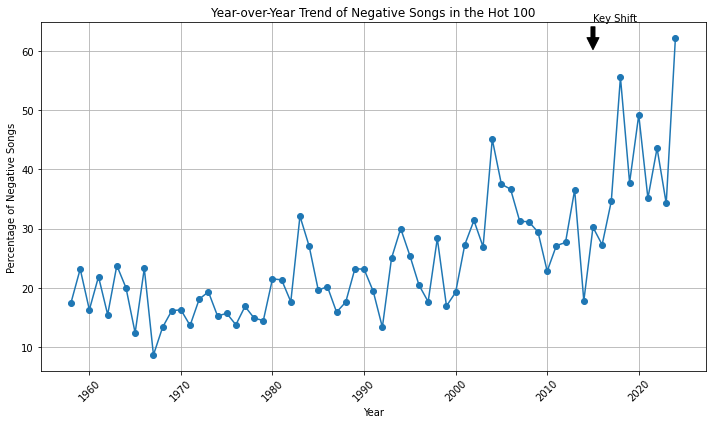

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from a CSV file
data = pd.read_csv('song_emotion_results.csv')

# Convert the 'chart_week' column to datetime
data['chart_week'] = pd.to_datetime(data['chart_week'])

# Extract the year from the 'chart_week' column
data['year'] = data['chart_week'].dt.year

# Group the data by year and calculate the percentage of negative songs
yearly_sentiment = data.groupby(['year', 'Sentiment']).size().unstack(fill_value=0)
yearly_sentiment['total'] = yearly_sentiment.sum(axis=1)
yearly_sentiment['percent_negative'] = yearly_sentiment['Negative'] / yearly_sentiment['total'] * 100

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_sentiment.index, yearly_sentiment['percent_negative'], marker='o')
plt.xlabel('Year')
plt.ylabel('Percentage of Negative Songs')
plt.title('Year-over-Year Trend of Negative Songs in the Hot 100')
plt.grid(True)
plt.xticks(rotation=45)

# Add annotations for key shifts or points of interest
# (You can customize this based on your specific data and insights)
plt.annotate('Key Shift', xy=(2015, 60), xytext=(2015, 65),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()

AttributeError: 'str' object has no attribute 'get'

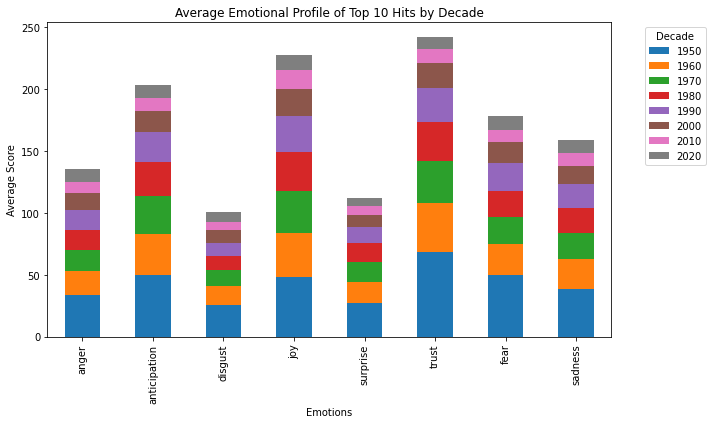

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Read the data from the CSV file
data = pd.read_csv('song_emotion_results.csv')

# Convert the 'chart_week' column to datetime
data['chart_week'] = pd.to_datetime(data['chart_week'])

# Extract the year and decade from the 'chart_week' column
data['year'] = data['chart_week'].dt.year
data['decade'] = (data['year'] // 10) * 10

# Filter the data to include only songs that reached the top 10
top_10_data = data[data['peak_pos'] <= 10]

# Convert the 'Emotions' column from string to dictionary
top_10_data['Emotions'] = top_10_data['Emotions'].apply(ast.literal_eval)

# Define the emotions to analyze
emotions = ['anger', 'anticipation', 'disgust', 'joy', 'surprise', 'trust', 'fear', 'sadness']

# Calculate the average emotion scores for each decade
decade_emotion_avg = top_10_data.groupby('decade').apply(lambda x: pd.Series({
    emotion: x['Emotions'].apply(lambda e: e.get(emotion, 0)).mean() for emotion in emotions
}))

# Transpose the dataframe to have emotions as columns and decades as rows
decade_emotion_avg = decade_emotion_avg.T

# Create a stacked bar chart
ax = decade_emotion_avg.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Emotions')
ax.set_ylabel('Average Score')
ax.set_title('Average Emotional Profile of Top 10 Hits by Decade')
ax.legend(title='Decade', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

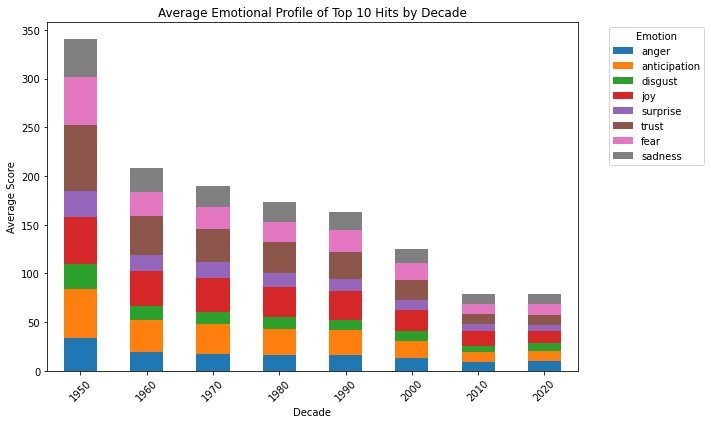

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Read the data from the CSV file
data = pd.read_csv('song_emotion_results.csv')

# Convert the 'chart_week' column to datetime
data['chart_week'] = pd.to_datetime(data['chart_week'])

# Extract the year and decade from the 'chart_week' column
data['year'] = data['chart_week'].dt.year
data['decade'] = (data['year'] // 10) * 10

# Filter the data to include only songs that reached the top 10
top_10_data = data[data['peak_pos'] <= 10]

# Convert the 'Emotions' column from string to dictionary
top_10_data['Emotions'] = top_10_data['Emotions'].apply(ast.literal_eval)

# Define the emotions to analyze
emotions = ['anger', 'anticipation', 'disgust', 'joy', 'surprise', 'trust', 'fear', 'sadness']

# Calculate the average emotion scores for each decade
decade_emotion_avg = top_10_data.groupby('decade').apply(lambda x: pd.Series({
    emotion: x['Emotions'].apply(lambda e: e.get(emotion, 0)).mean() for emotion in emotions
}))

# Create a stacked bar chart
ax = decade_emotion_avg.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Decade')
ax.set_ylabel('Average Score')
ax.set_title('Average Emotional Profile of Top 10 Hits by Decade')
ax.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

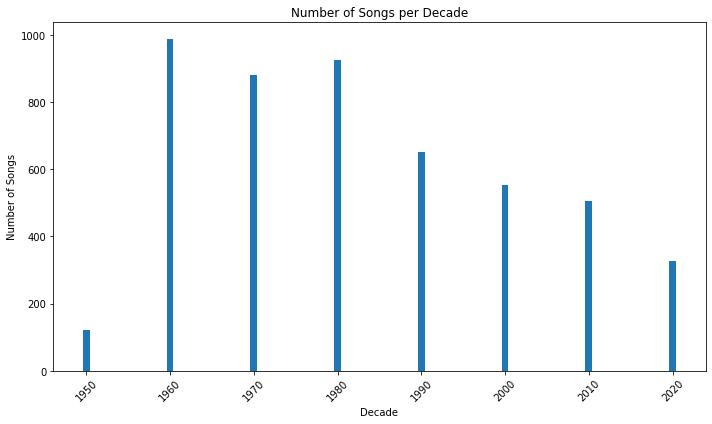

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('song_emotion_results.csv')

# Convert the 'chart_week' column to datetime
data['chart_week'] = pd.to_datetime(data['chart_week'])

# Extract the year and decade from the 'chart_week' column
data['year'] = data['chart_week'].dt.year
data['decade'] = (data['year'] // 10) * 10

# Count the number of songs per decade
songs_per_decade = data['decade'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(songs_per_decade.index, songs_per_decade.values)
plt.xlabel('Decade')
plt.ylabel('Number of Songs')
plt.title('Number of Songs per Decade')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()